In [2]:
import pandas as pd

In [92]:
donor_metadata = pd.read_excel("./../data/sea-ad_cohort_donor_metadata_072524.xlsx")
neuropath = pd.read_csv("./../data/sea-ad_all_mtg_quant_neuropath_bydonorid_081122.csv")
mri = pd.read_excel("./../data/sea-ad_cohort_mri_volumetrics.xlsx")
# luminex = pd.read_excel("./../data/sea-ad_cohort_mtg-tissue_extractions-luminex_data.xlsx")


# Read the first two rows from the Excel file
file_path = 'your_file.xlsx'  # Replace with your actual file path
header_rows = pd.read_excel("./../data/sea-ad_cohort_mtg-tissue_extractions-luminex_data.xlsx", header=None, nrows=2)
combined_header = header_rows.astype(str).replace("nan", "").agg(''.join, axis=0)
luminex = pd.read_excel("./../data/sea-ad_cohort_mtg-tissue_extractions-luminex_data.xlsx", header=None, skiprows=2)
luminex.columns = combined_header

df = pd.merge(pd.merge(pd.merge(donor_metadata, neuropath, on="Donor ID"), mri, on="Donor ID"), luminex, on="Donor ID")
# df = df[df["Have they had neuroimaging"] == "Yes"]

df["vascular_dementia"] = df["Consensus Clinical Dx (choice=Vascular Dementia)"] == 'Checked'
df["alzheimers_dementia"] = (df["Consensus Clinical Dx (choice=Alzheimers disease)"] == "Checked") | (df["Consensus Clinical Dx (choice=Alzheimers Possible/ Probable)"] == "Checked")
df["control"] = df["Consensus Clinical Dx (choice=Control)"] == 'Checked'

In [68]:
print(sum(df.alzheimers_dementia))
print(sum(df.control))
print(sum(df["Cognitive Status"] == "No dementia"))
df = df[df['alzheimers_dementia'] | df['control']]


29
31
31


In [63]:
df.head()

Donor ID Primary Study Name Secondary Study Name  Age at Death     Sex  \
0  H19.33.004                ACT                  NaN            80  Female   
1  H20.33.001                ACT                  NaN            82    Male   
2  H20.33.002                ACT                  NaN            97  Female   
3  H20.33.004                ACT                  NaN            86    Male   
4  H20.33.005                ACT                  NaN            99  Female   

  Race (choice=White) Race (choice=Black/ African American)  \
0             Checked                             Unchecked   
1             Checked                             Unchecked   
2             Checked                             Unchecked   
3             Checked                             Unchecked   
4             Checked                             Unchecked   

  Race (choice=Asian) Race (choice=American Indian/ Alaska Native)  \
0           Unchecked                                    Unchecked   
1           Unchecked                                    Unchecked   
2           Unchecked                                    Unchecked   
3           Unchecked                                    Unchecked   
4           Unchecked                                    Unchecked   

  Race (choice=Native Hawaiian or Pacific Islander)  ... ABeta42 pg/ug  \
0                                         Unchecked  ...      0.971579   
1                                         Unchecked  ...      2.744211   
2                                         Unchecked  ...      0.147158   
3                                         Unchecked  ...     80.266316   
4                                         Unchecked  ...     16.156842   

    tTAU pg/ug pTAU pg/ug  \
0  1552.414737   1.901053   
1   756.090526   2.737895   
2   313.525263   2.615789   
3   318.528421   7.412632   
4   107.348421   1.327368   

  GuHCl (Guanidine Hydrochloride) Buffer Tissue extractionsABeta40 pg/ug  \
0                                           1.409474                       
1                                           1.015616                       
2                                           0.100708                       
3                                          91.172000                       
4                                          28.778000                       

  ABeta42 pg/ug  tTAU pg/ug pTAU pg/ug vascular_dementia  alzheimers_dementia  \
0      9.487368   93.387368   1.493684             False                False   
1      7.822105   76.413684   1.580000             False                False   
2      0.610526   31.521053   1.068421             False                False   
3    226.900000   44.423158   2.397895             False                 True   
4    121.266000   10.516842   0.545263             False                False   

   control  
0     True  
1     True  
2     True  
3    False  
4     True  

[5 rows x 620 columns]

In [79]:
print(mri.shape)
display(pd.DataFrame(luminex.columns, columns=['Column Names']))


(84, 151)


Column Names
0                                           Donor ID
1        RIPA Buffer Tissue extractionsABeta40 pg/ug
2                                      ABeta42 pg/ug
3                                         tTAU pg/ug
4                                         pTAU pg/ug
5  GuHCl (Guanidine Hydrochloride) Buffer Tissue ...
6                                      ABeta42 pg/ug
7                                         tTAU pg/ug
8                                         pTAU pg/ug

In [93]:
crosstab = pd.crosstab(df['Cognitive Status'], df['Atherosclerosis'])

crosstab = crosstab.reindex(index=['Dementia', 'No dementia'], columns=['Mild', 'Moderate', 'Severe'], fill_value=0)

# Display the crosstab
print(crosstab)

Atherosclerosis   Mild  Moderate  Severe
Cognitive Status                        
Dementia            10        28       3
No dementia         12        23       1


In [66]:
crosstab = pd.crosstab(df['Overall AD neuropathological Change'], df['Atherosclerosis'])

crosstab = crosstab.reindex(index=['Not AD', 'Low', 'Intermediate', 'High'], columns=['Mild', 'Moderate', 'Severe'], fill_value=0)

# Display the crosstab
print(crosstab)

Atherosclerosis                      Mild  Moderate  Severe
Overall AD neuropathological Change                        
Not AD                                  2         6       0
Low                                     5         1       0
Intermediate                            3         9       1
High                                    8        22       2


15


/var/folders/4j/0g3dxy6901134lp72sg7z5sm0000gp/T/ipykernel_86320/1999845522.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="Atherosclerosis", y=outcome, palette="viridis", capsize = 0.1)
/var/folders/4j/0g3dxy6901134lp72sg7z5sm0000gp/T/ipykernel_86320/1999845522.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="Atherosclerosis", y=outcome, palette="viridis", capsize = 0.1)
/var/folders/4j/0g3dxy6901134lp72sg7z5sm0000gp/T/ipykernel_86320/1999845522.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.bar

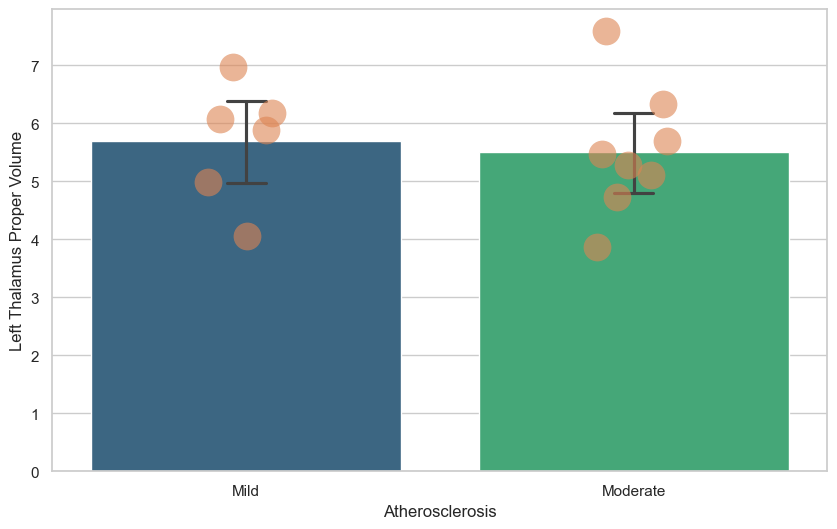

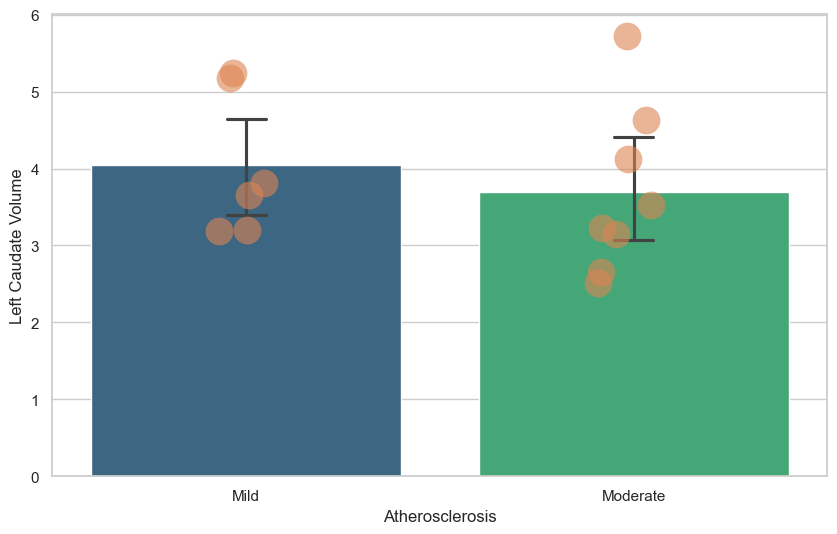

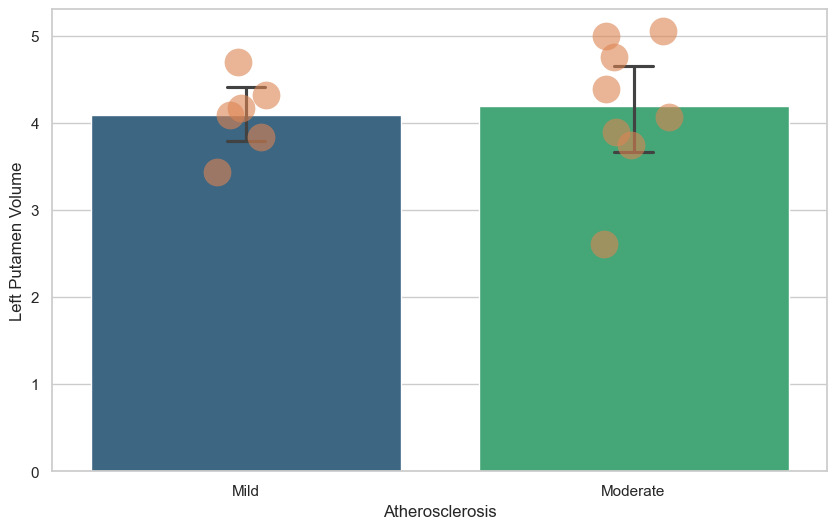

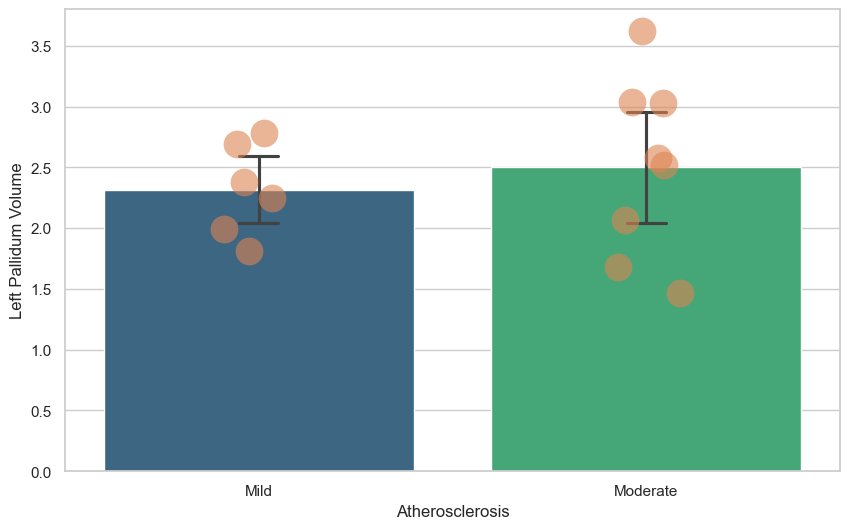

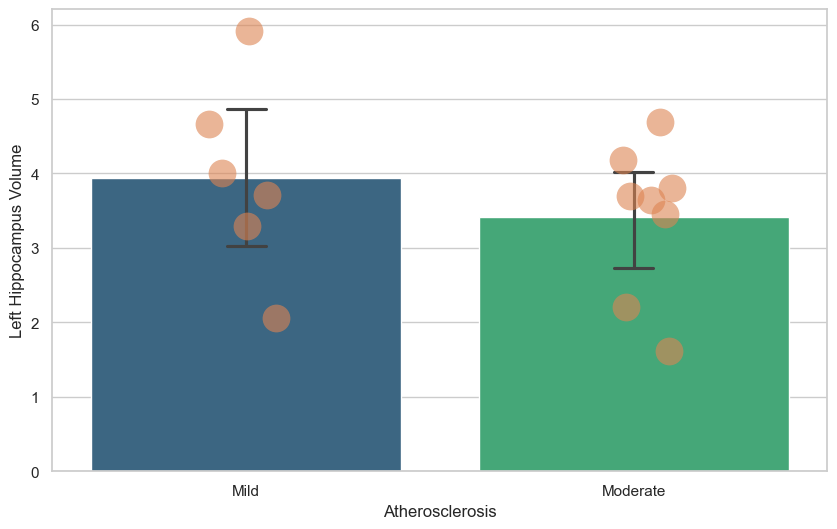

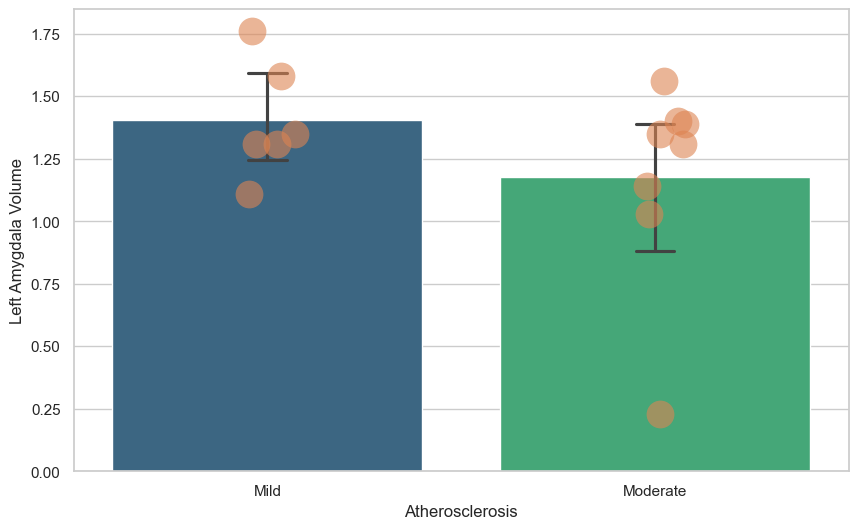

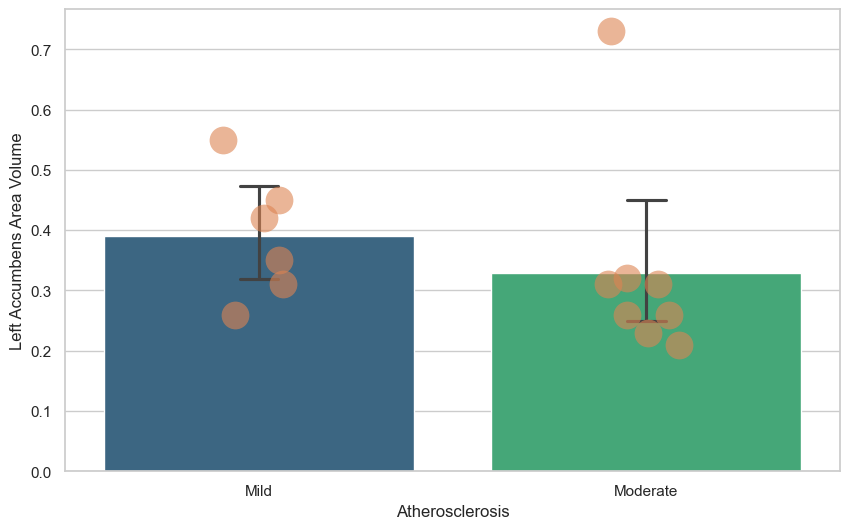

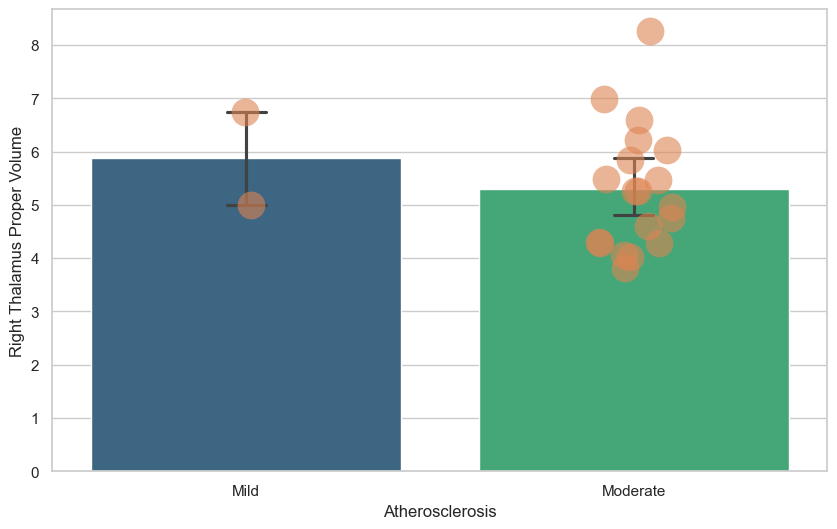

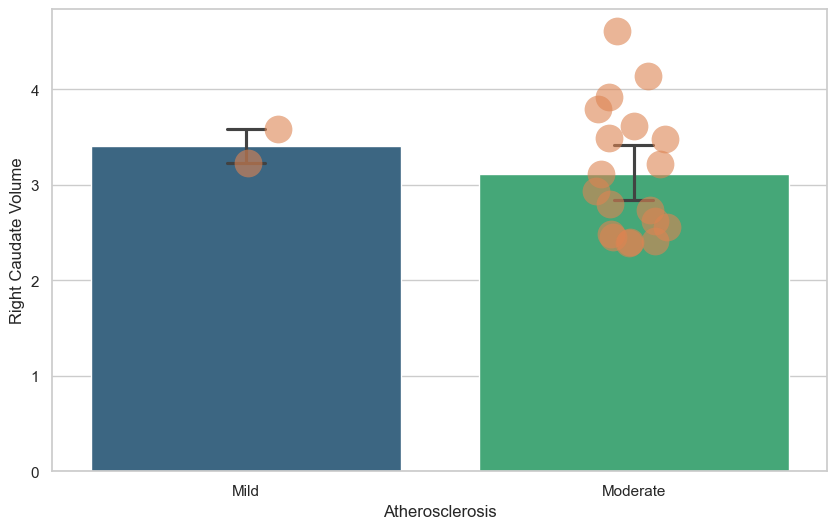

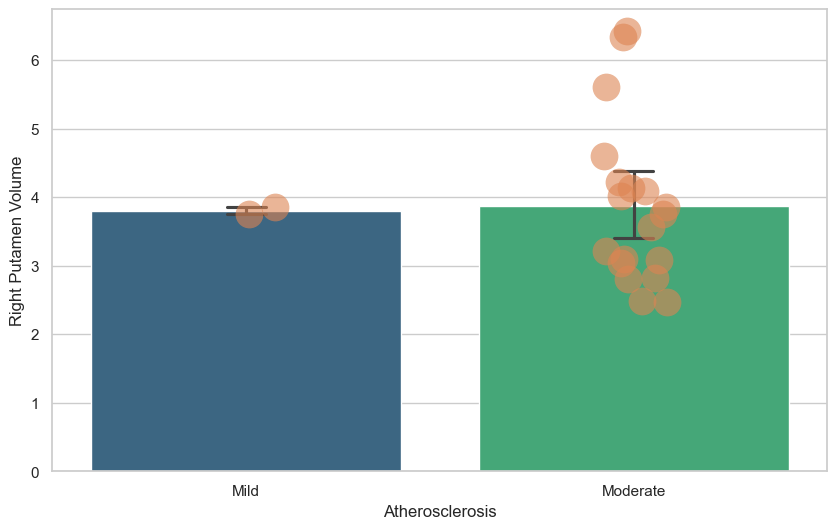

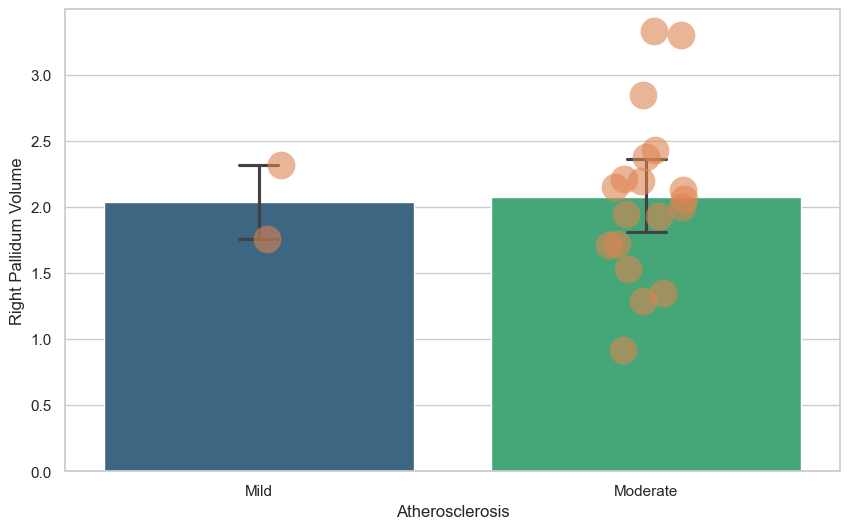

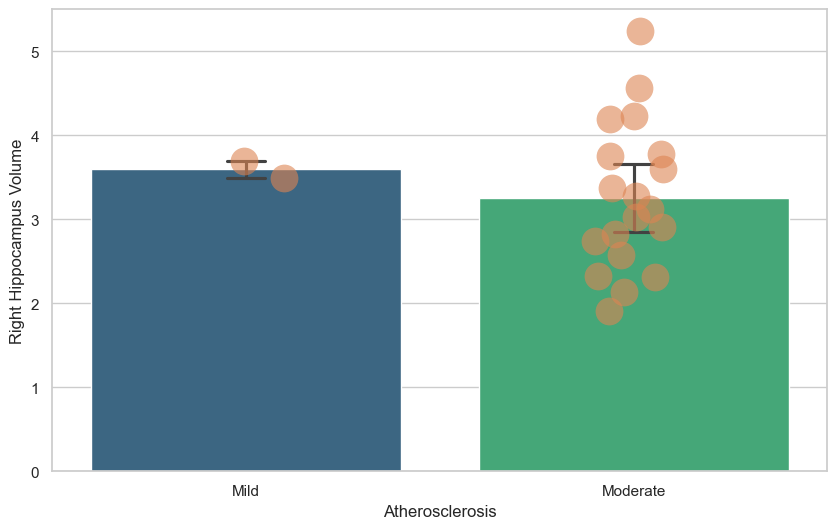

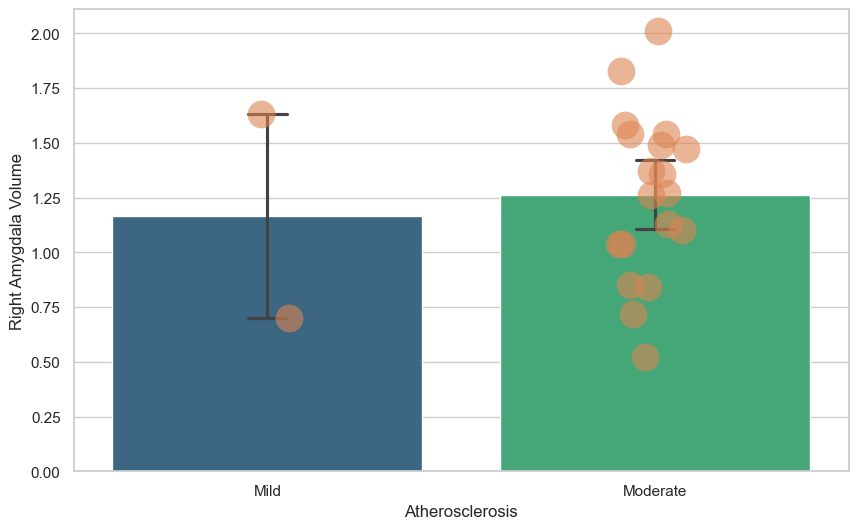

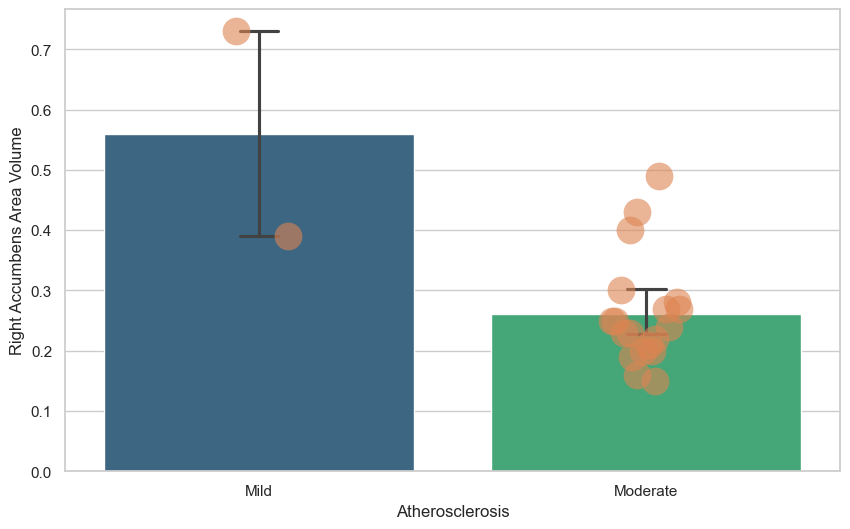

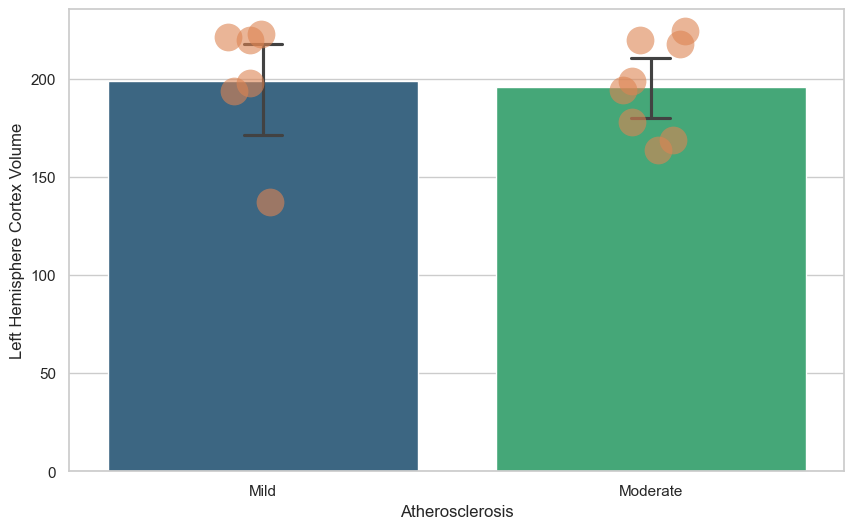

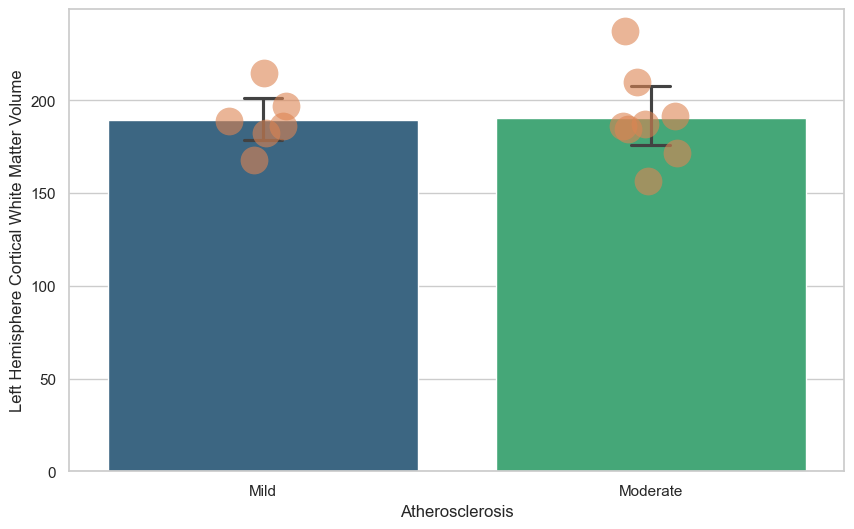

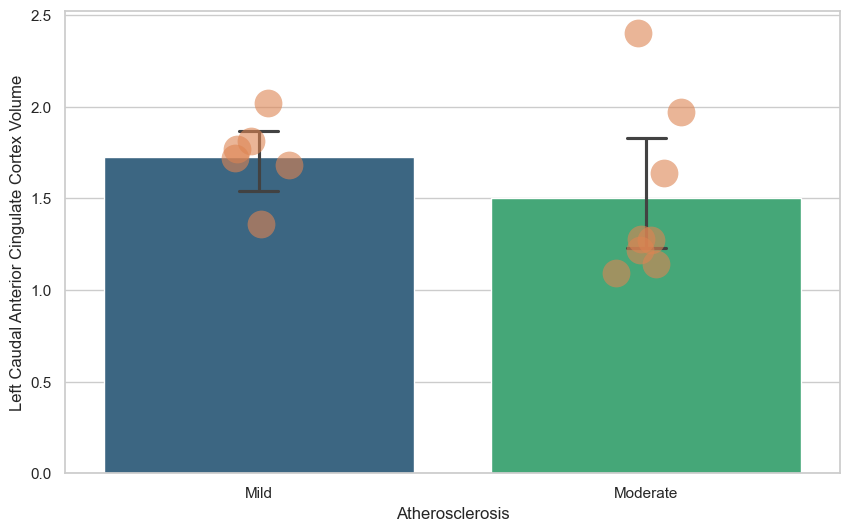

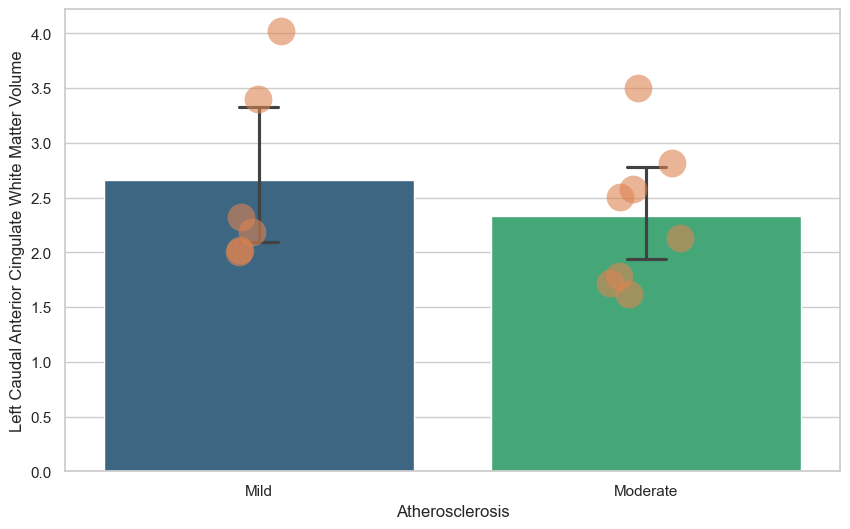

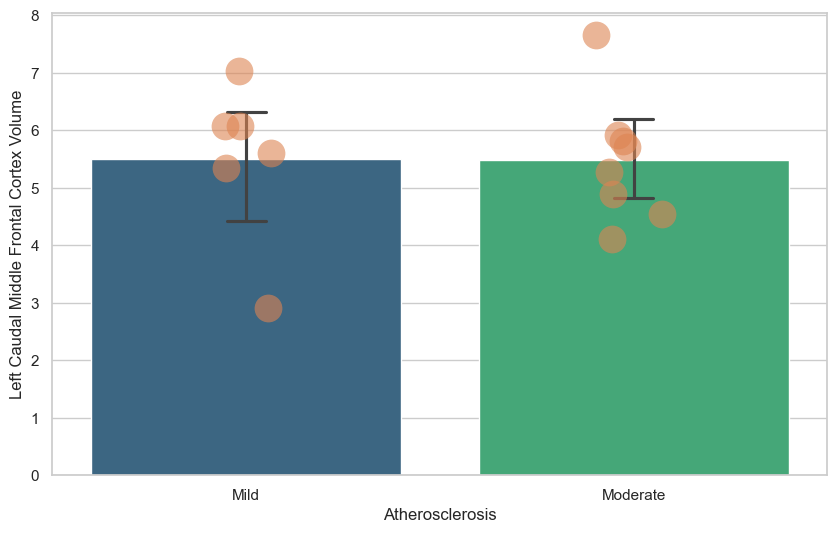

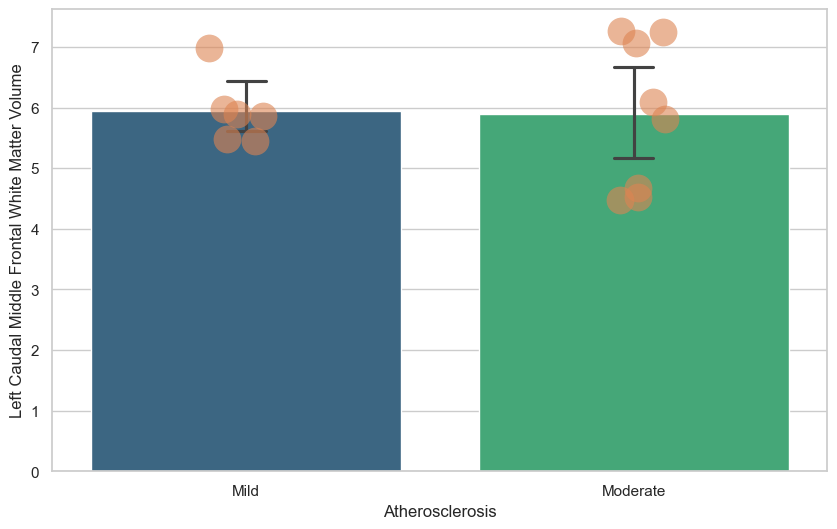

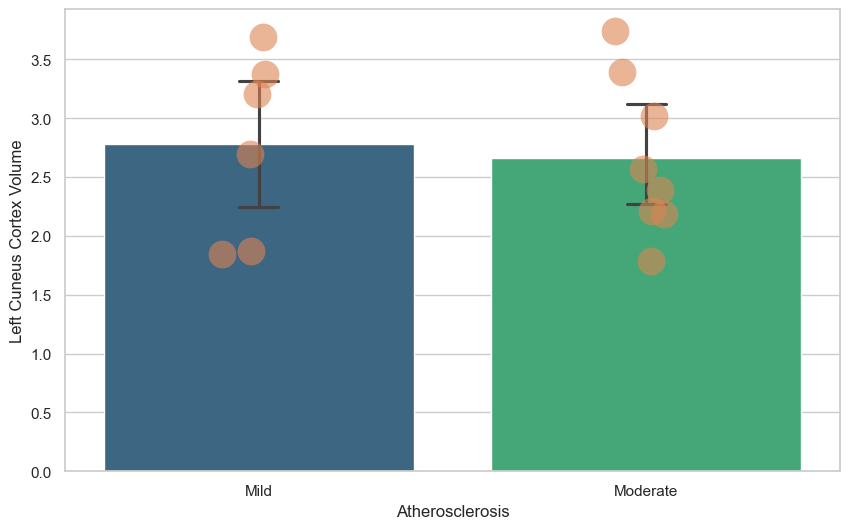

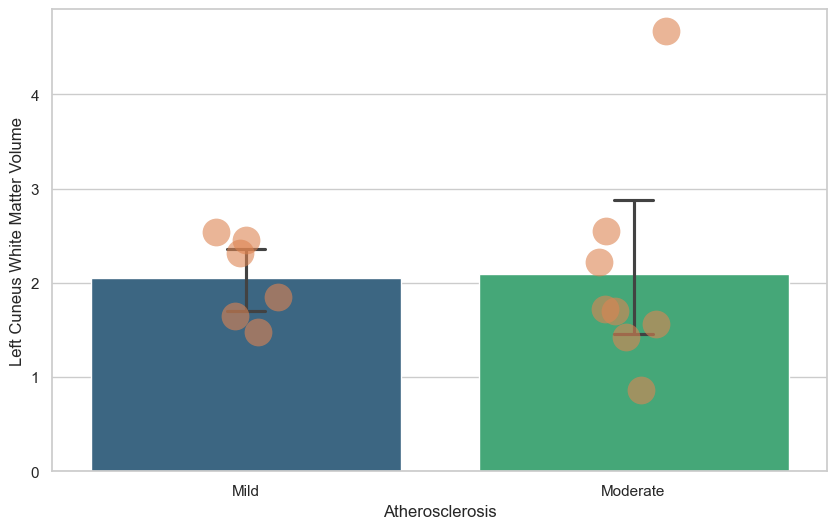

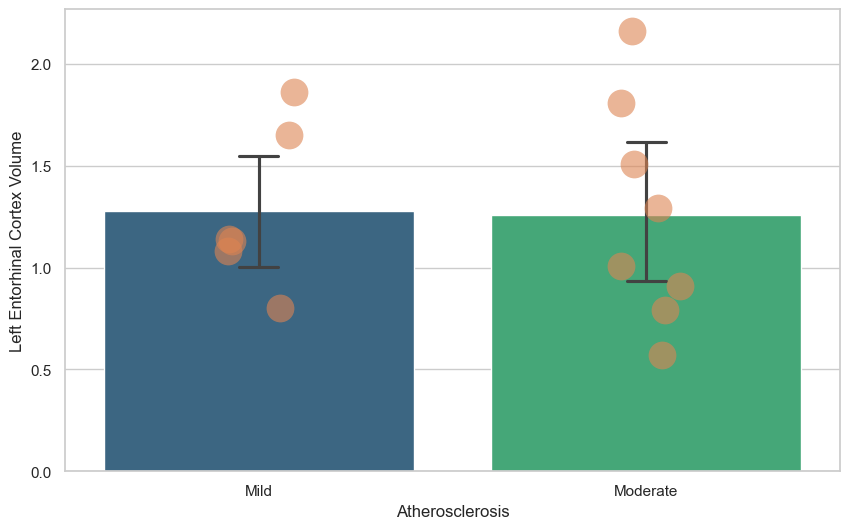

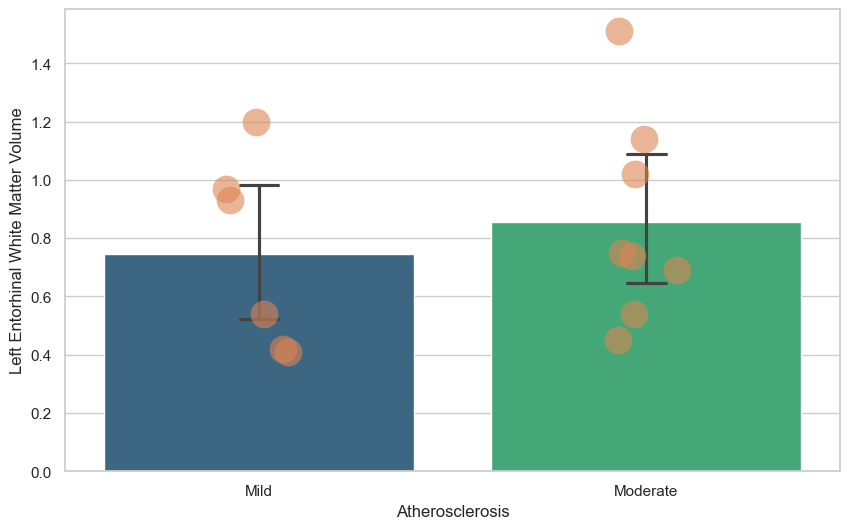

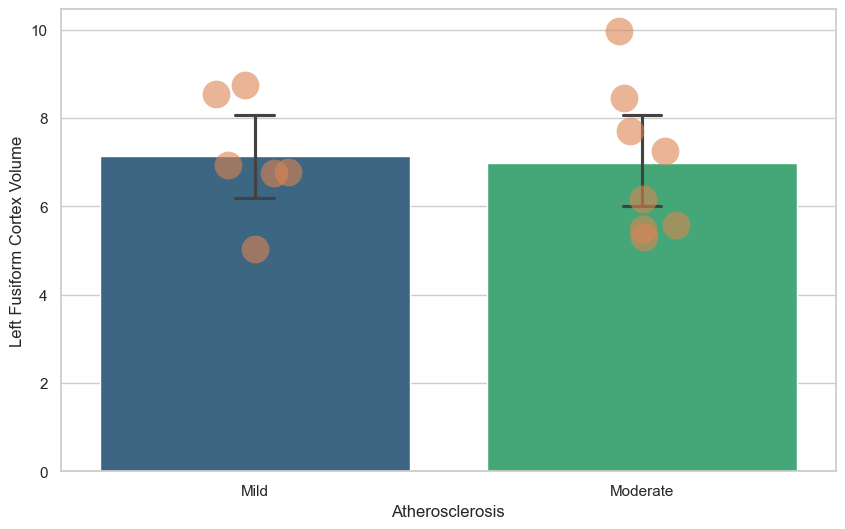

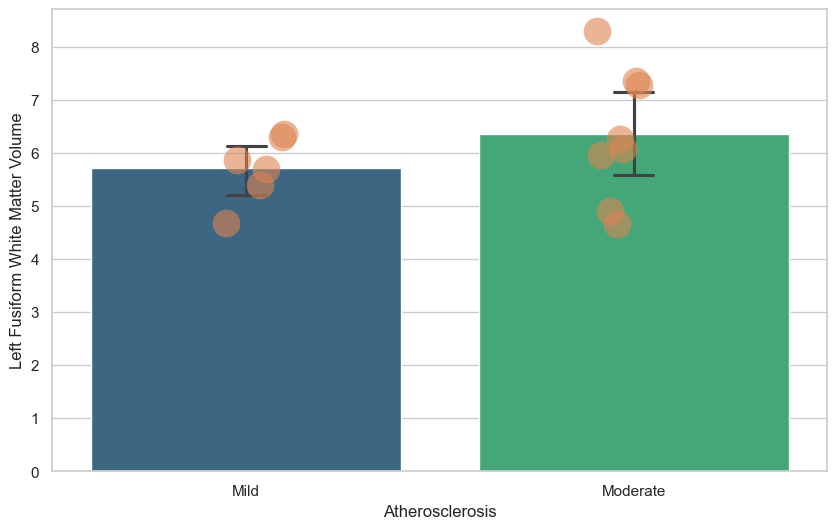

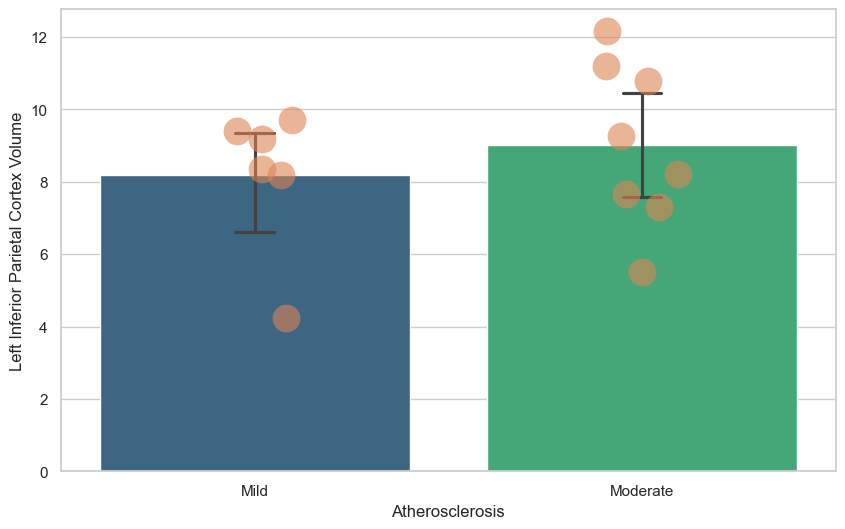

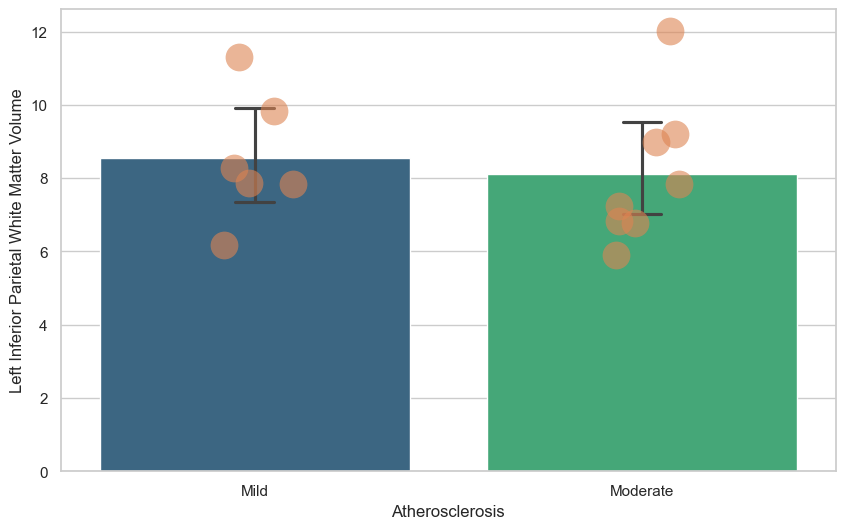

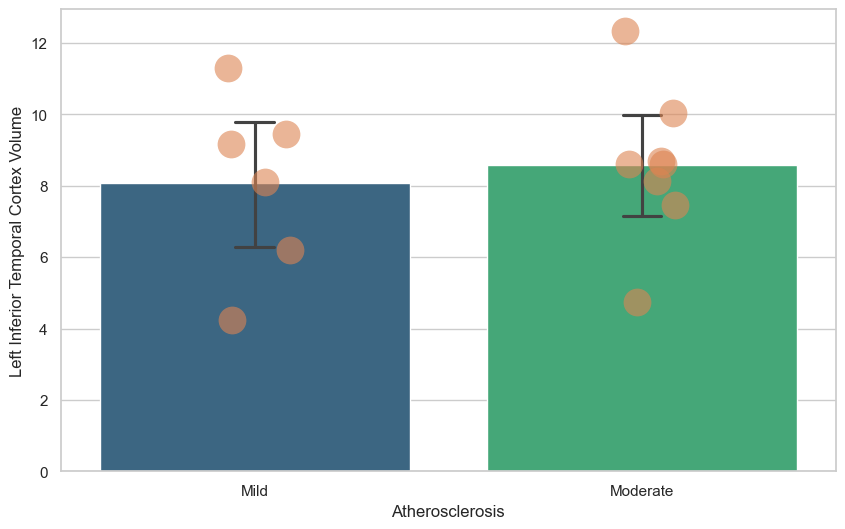

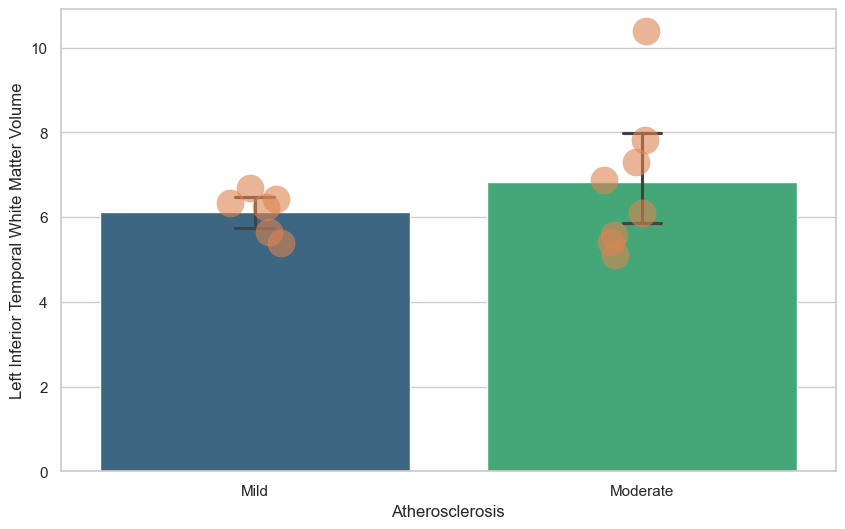

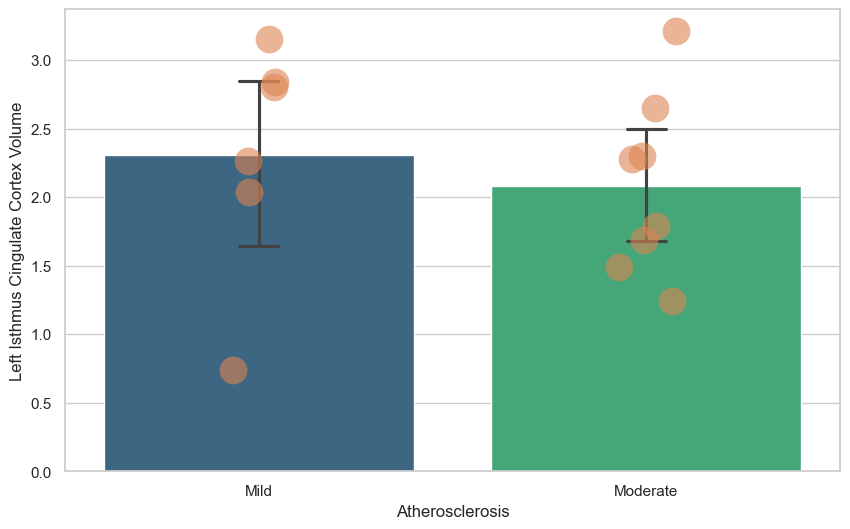

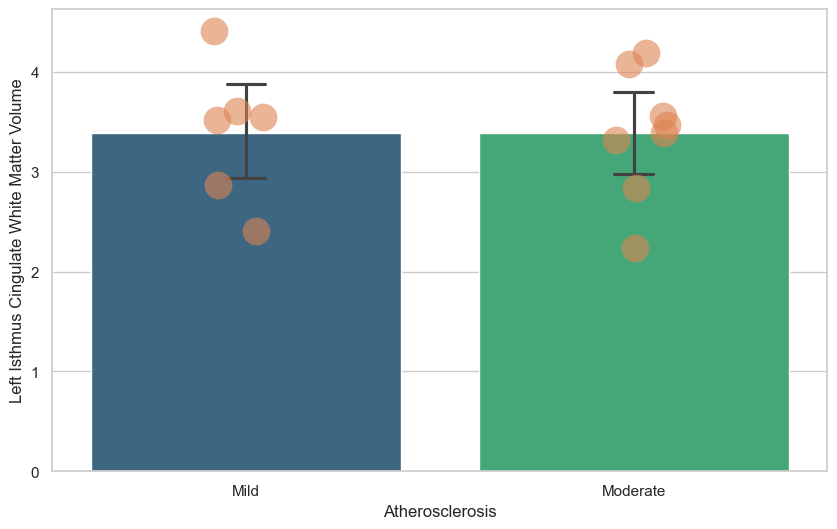

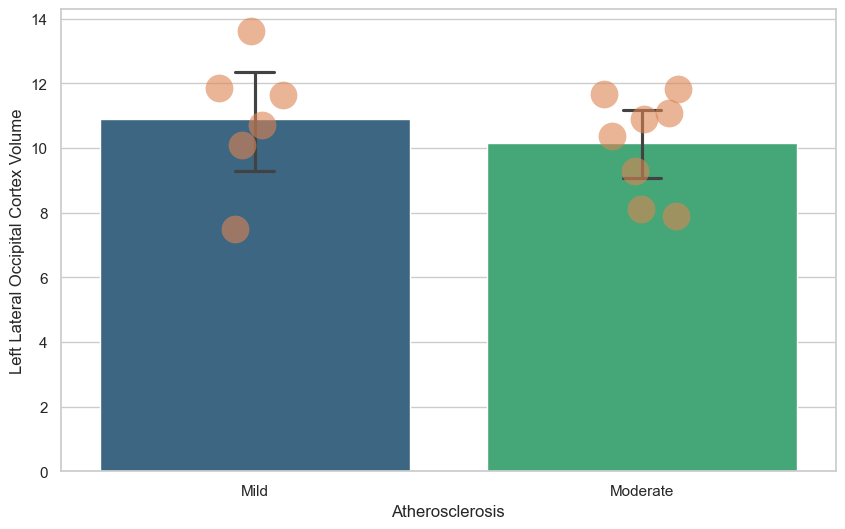

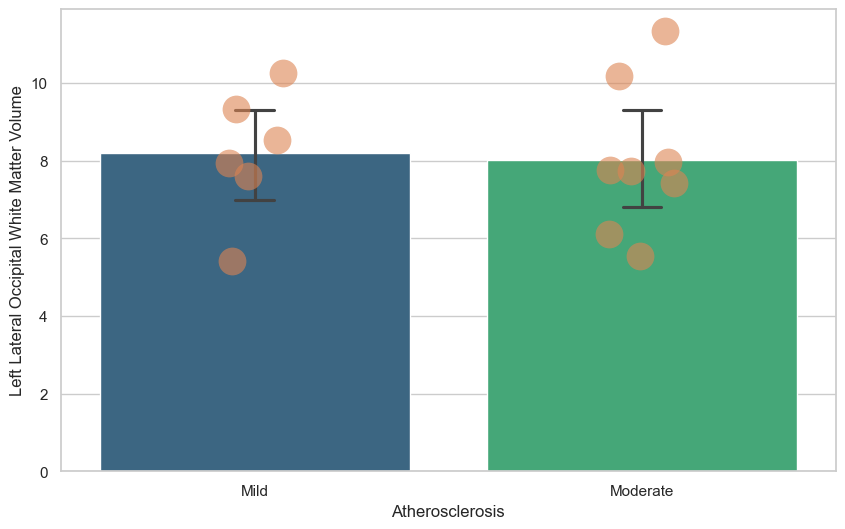

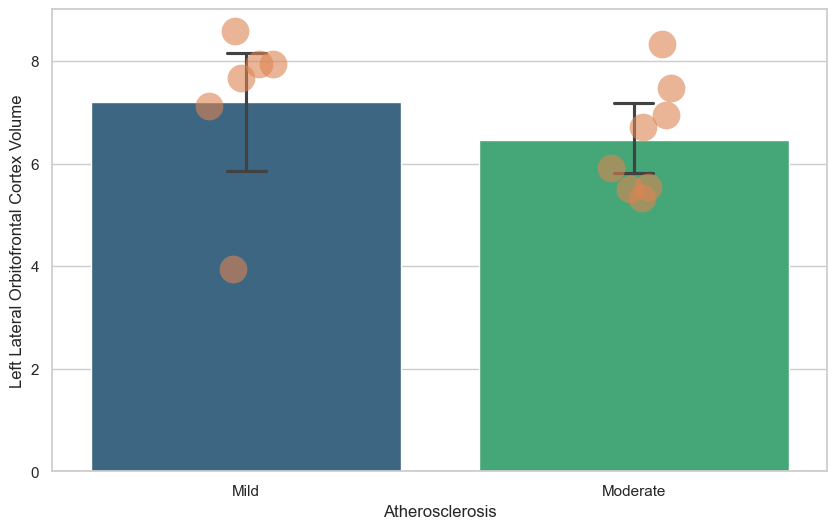

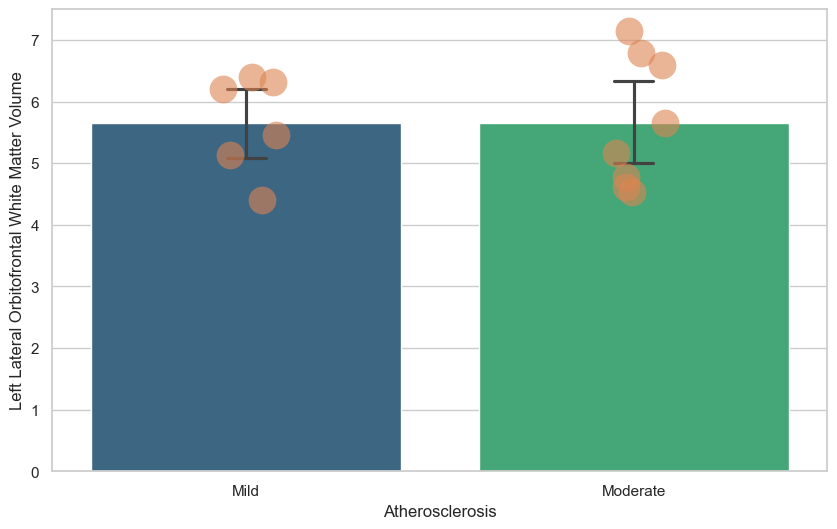

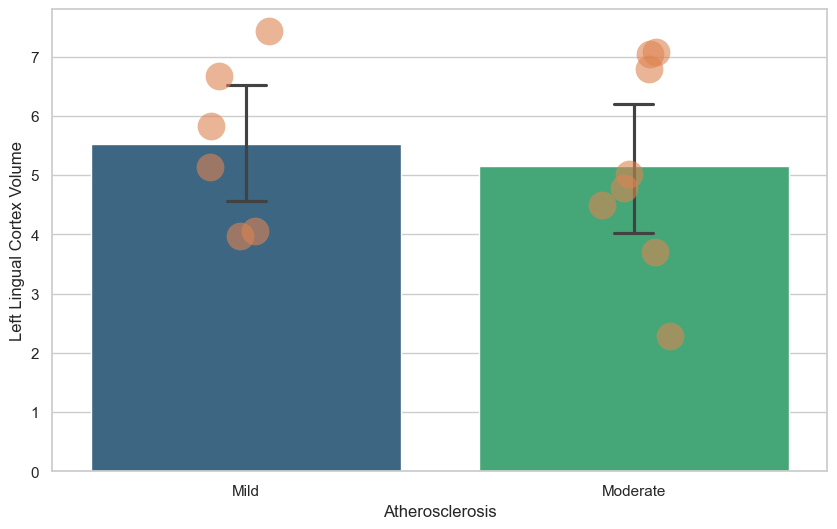

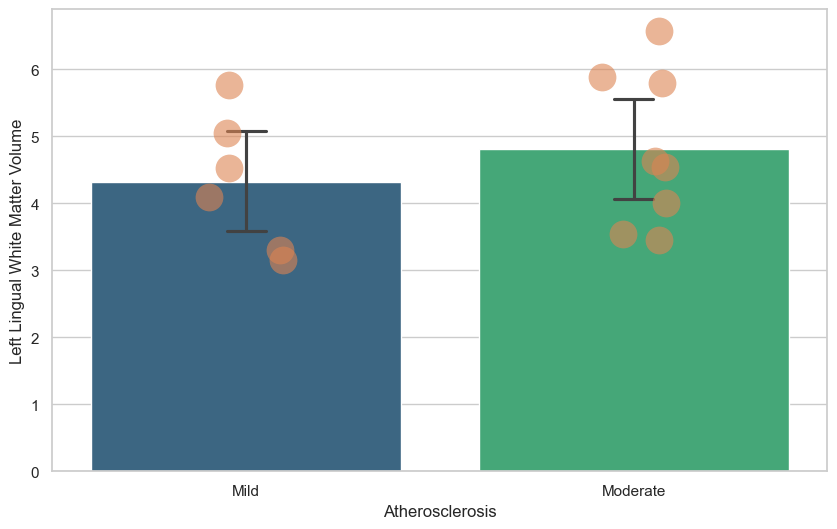

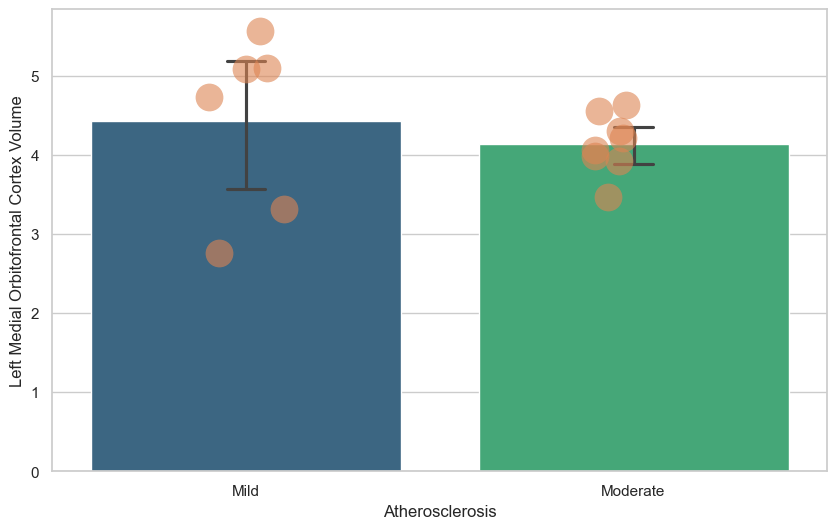

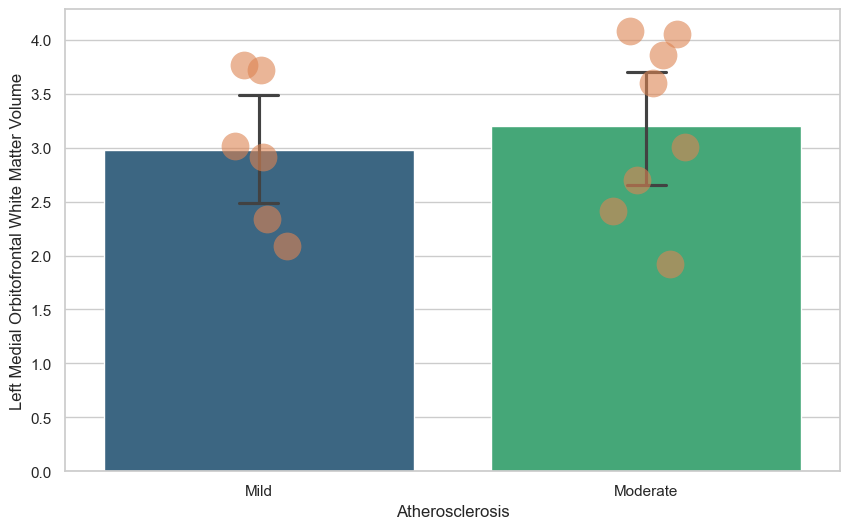

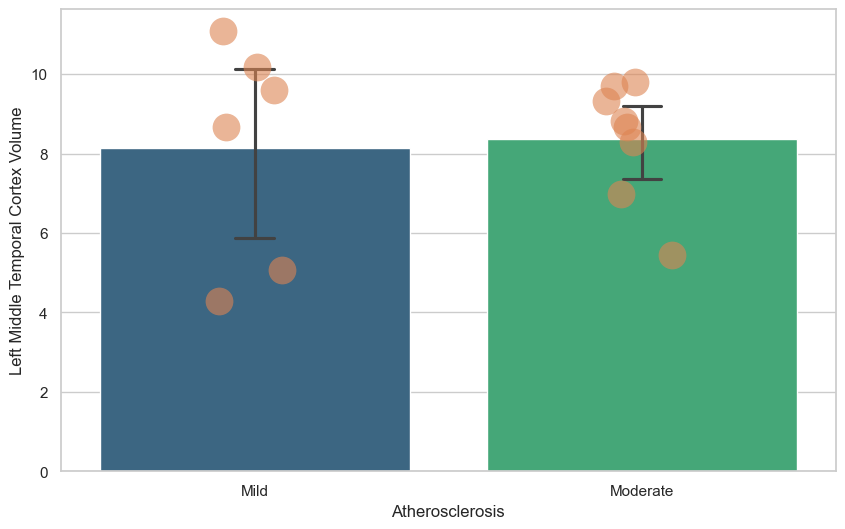

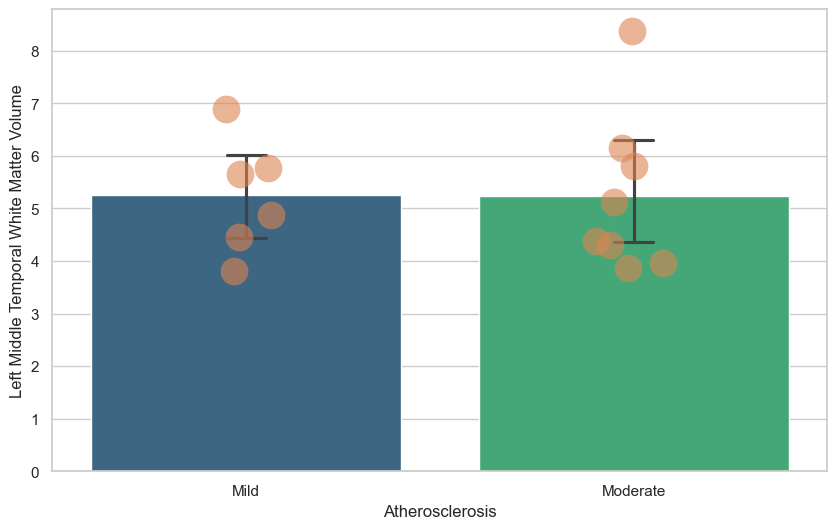

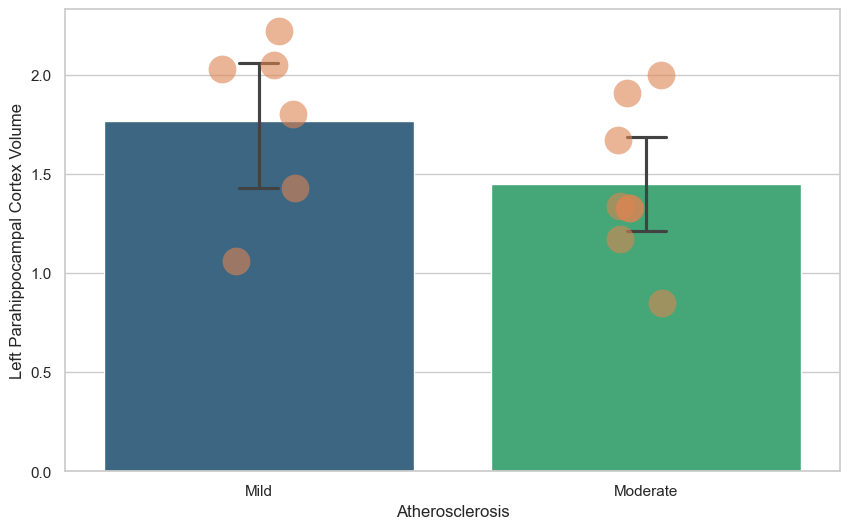

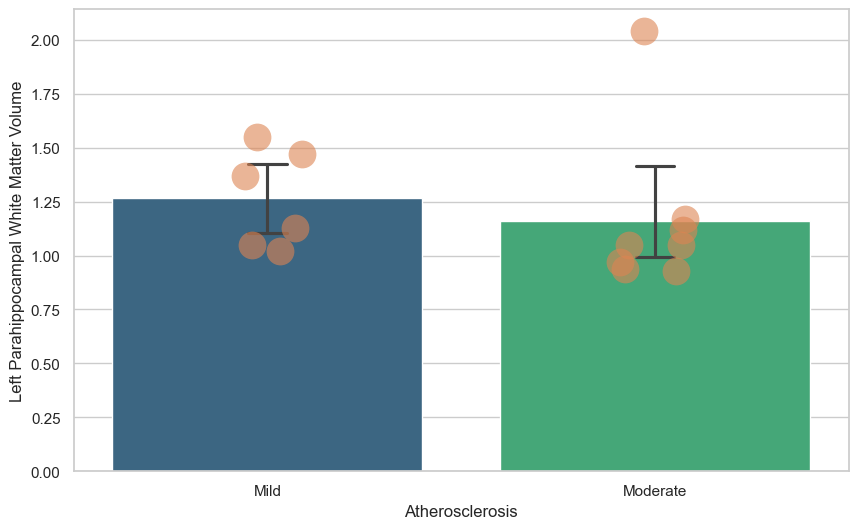

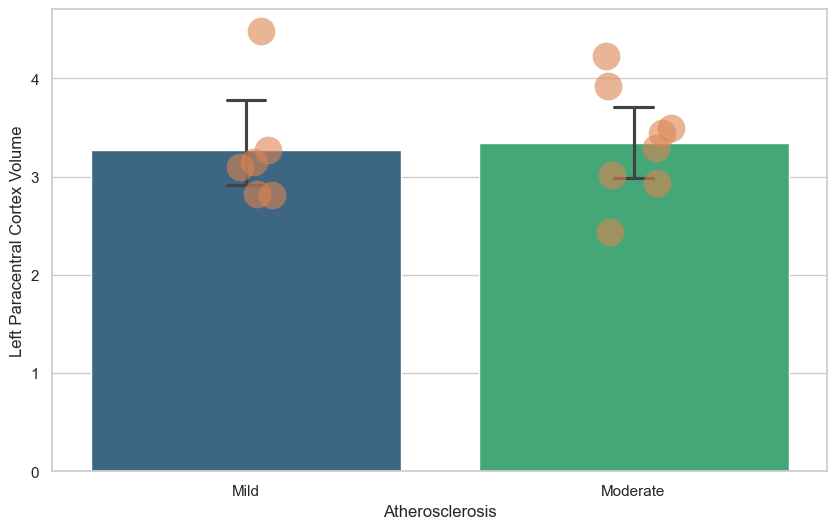

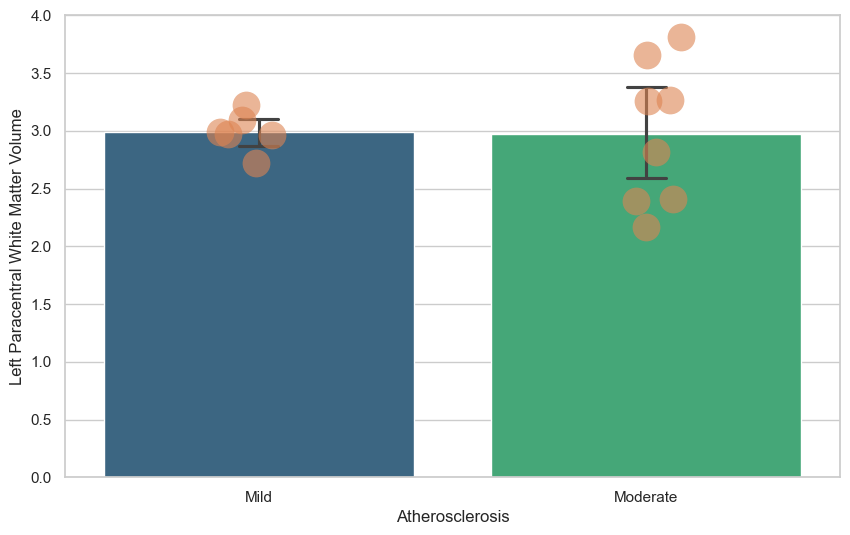

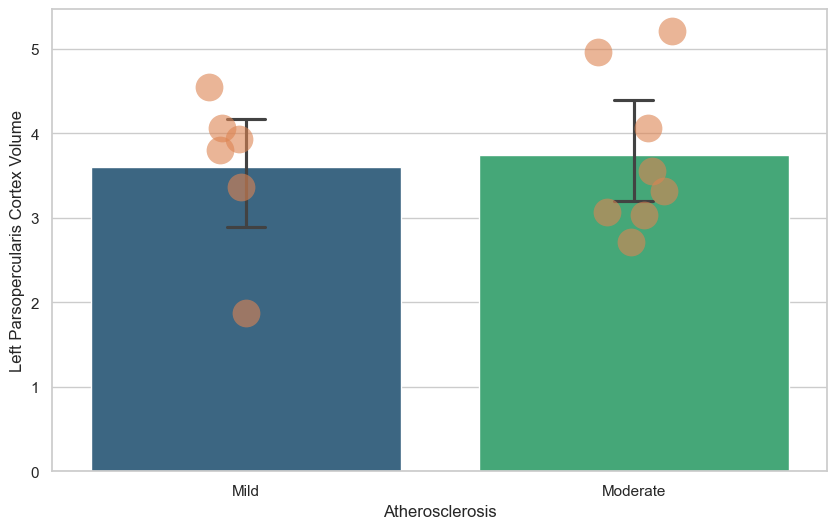

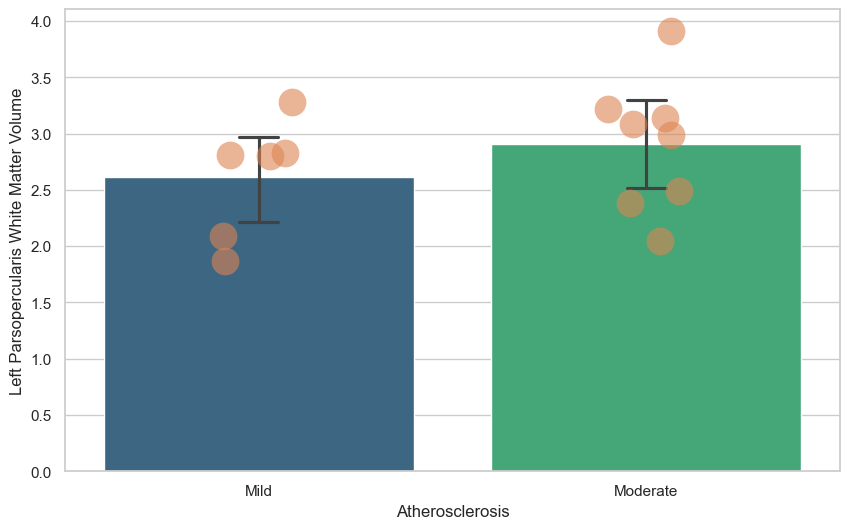

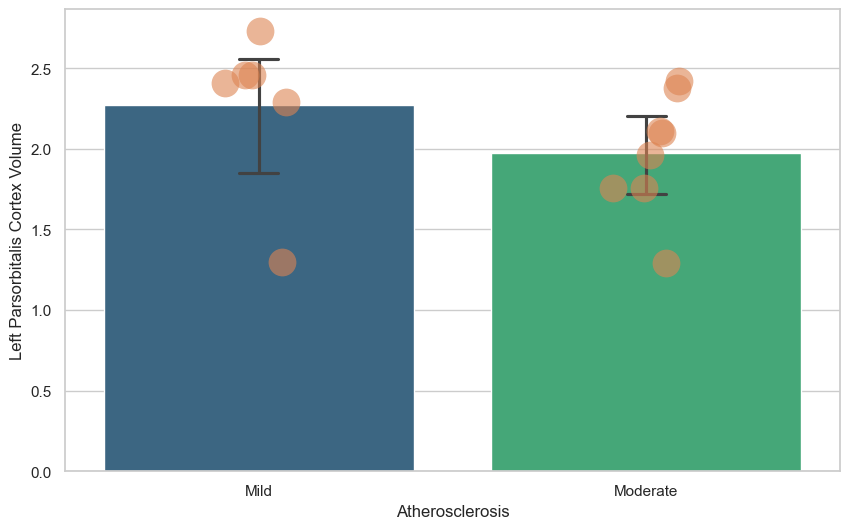

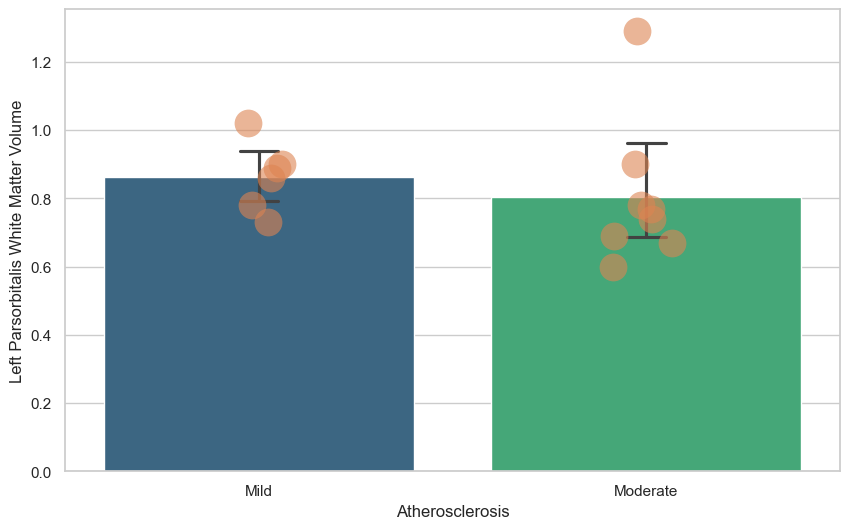

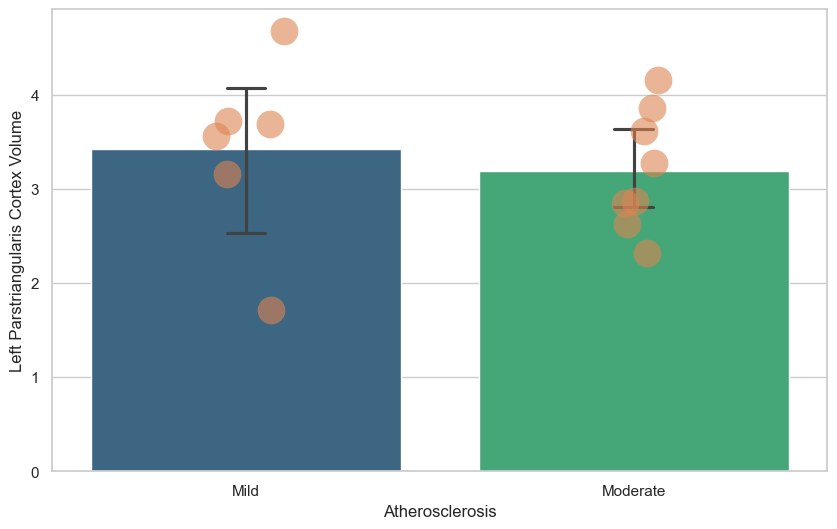

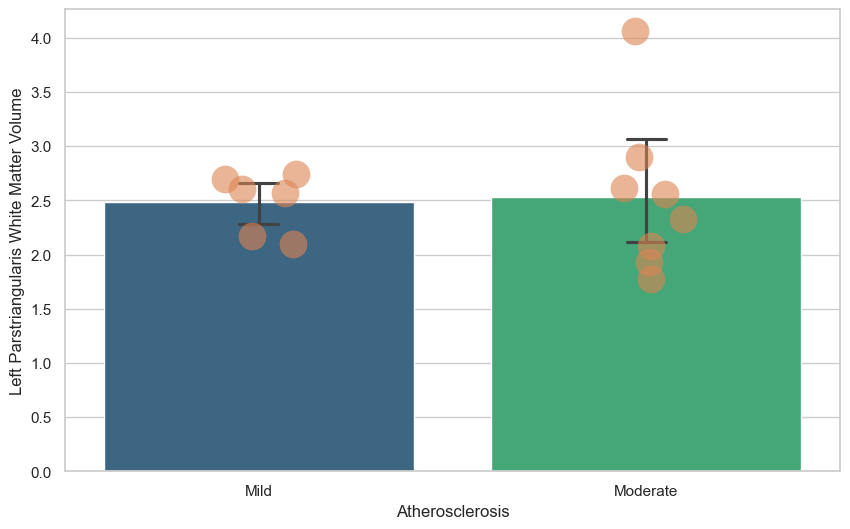

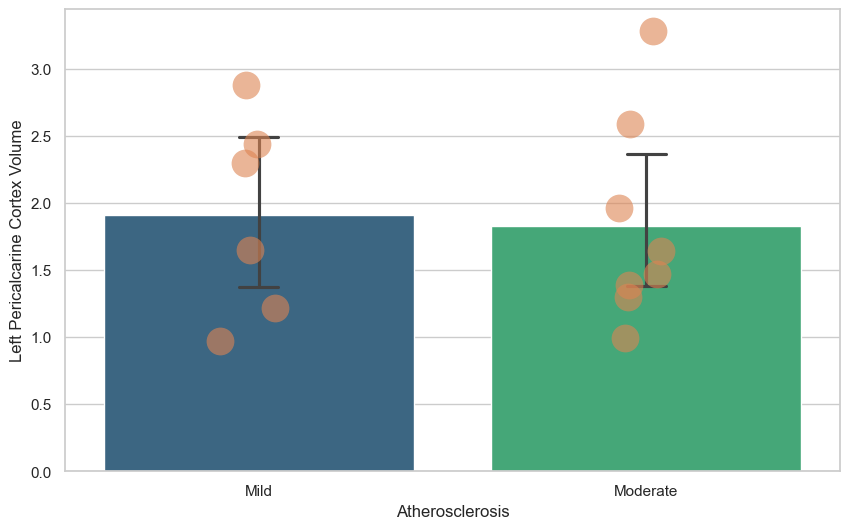

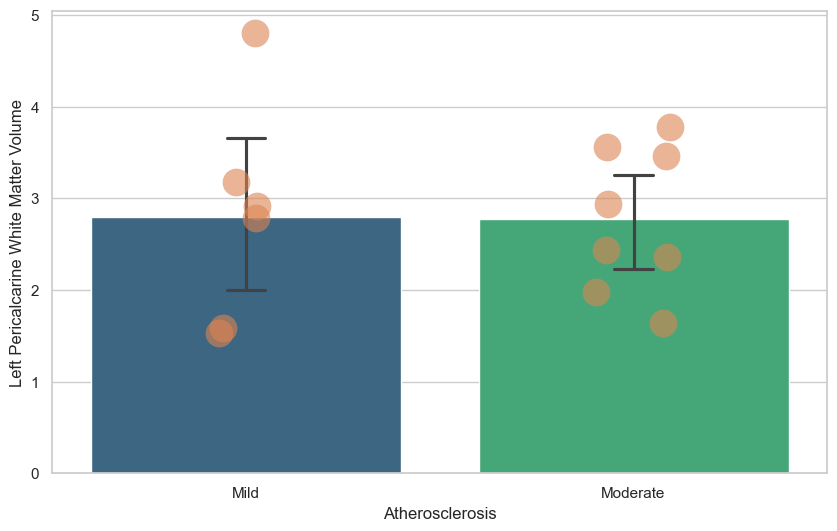

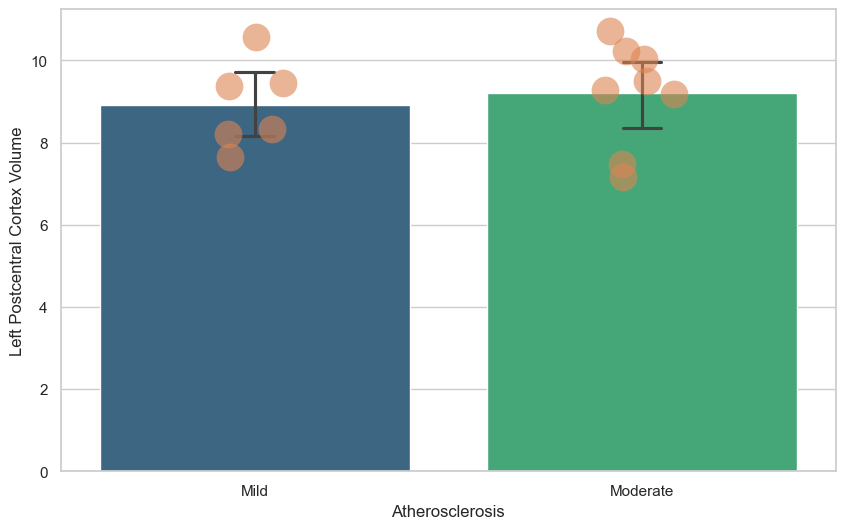

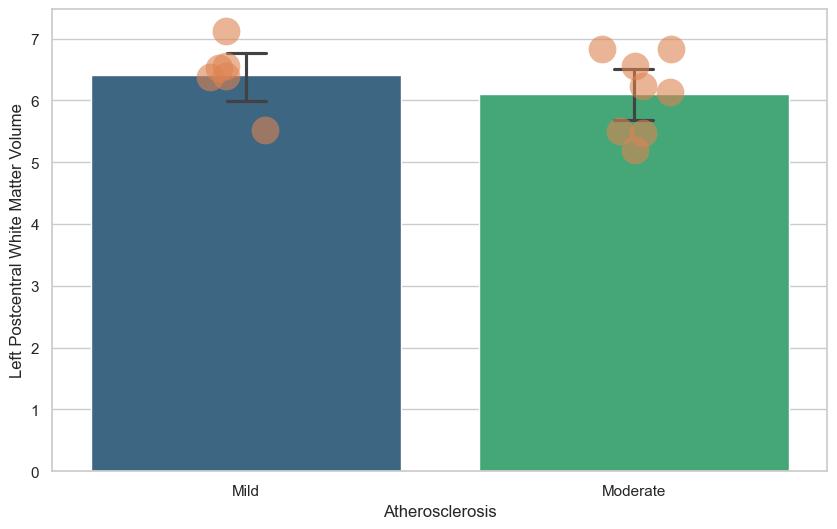

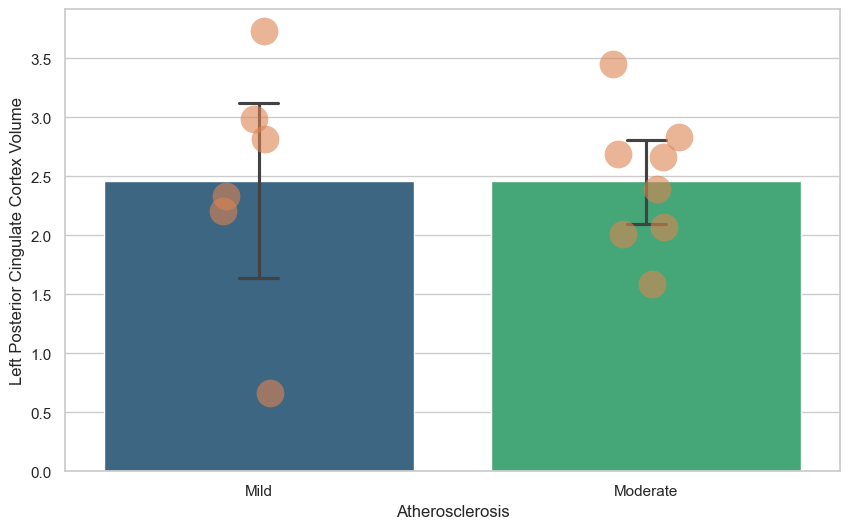

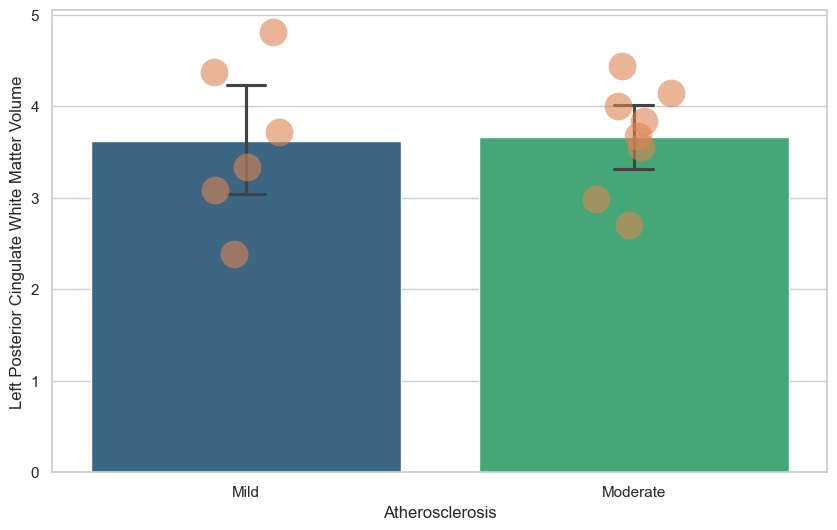

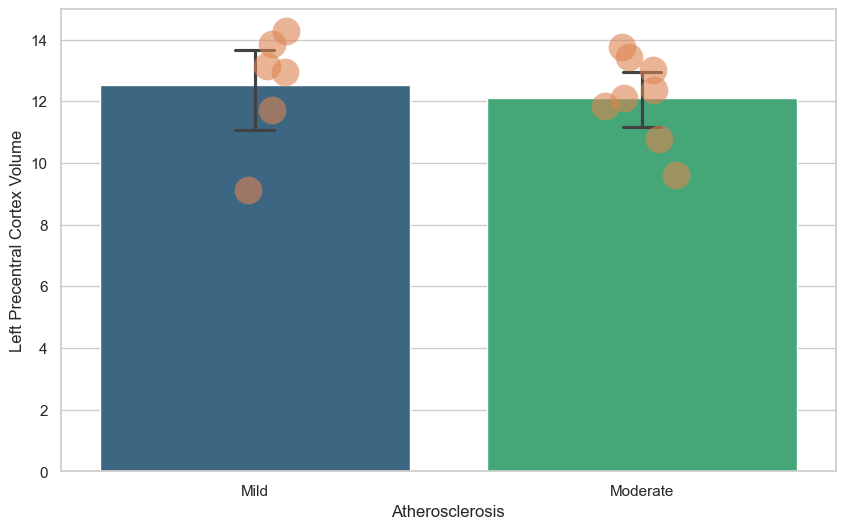

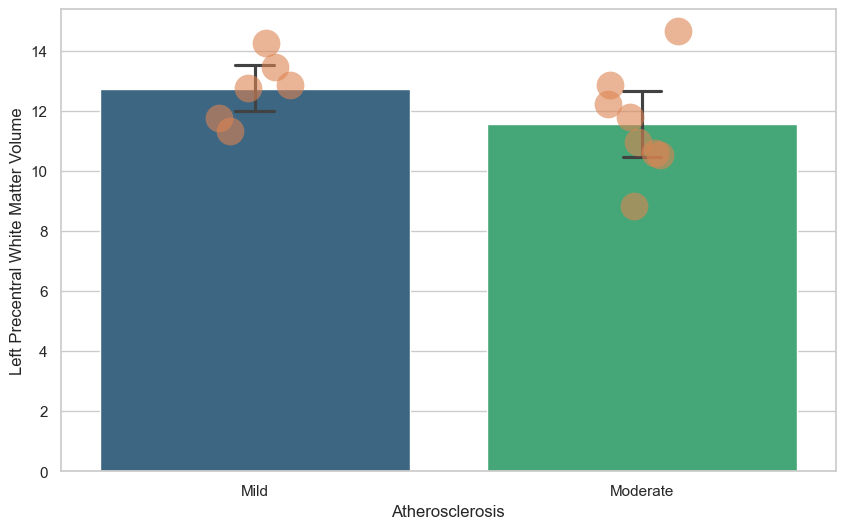

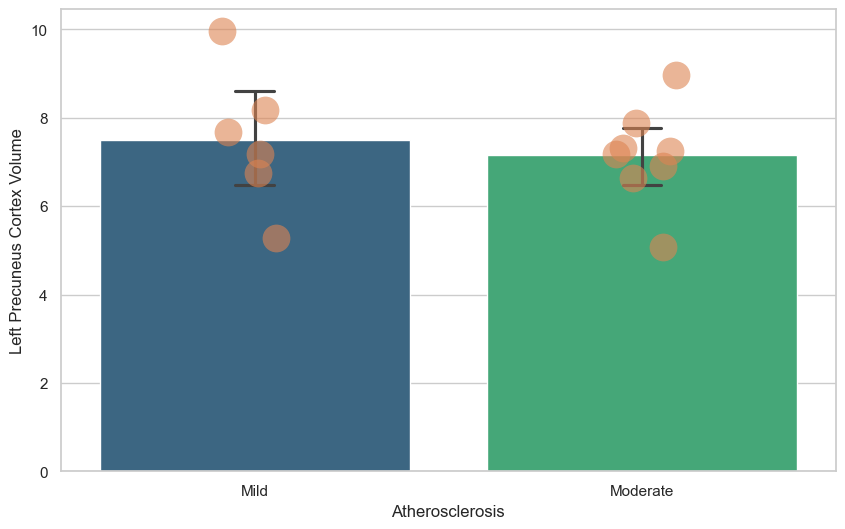

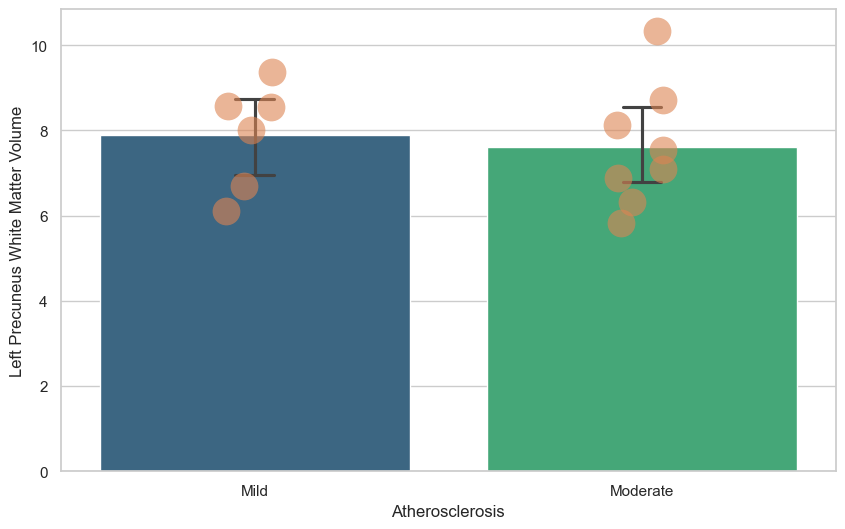

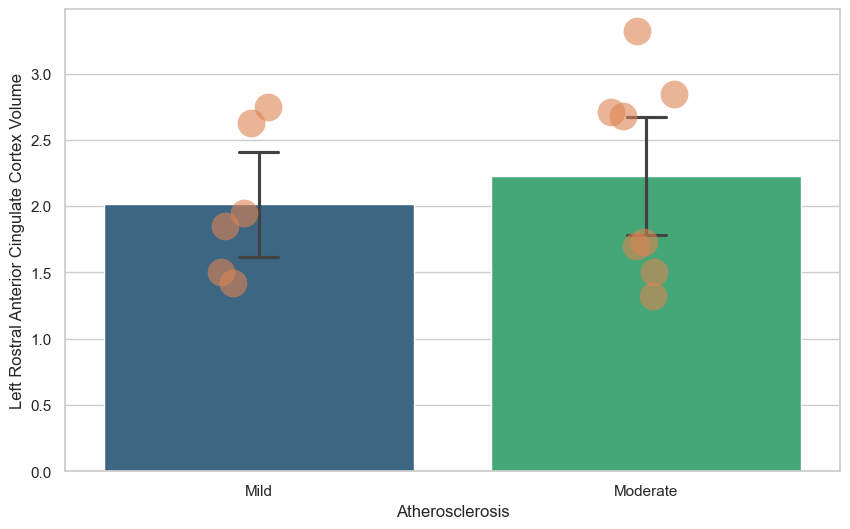

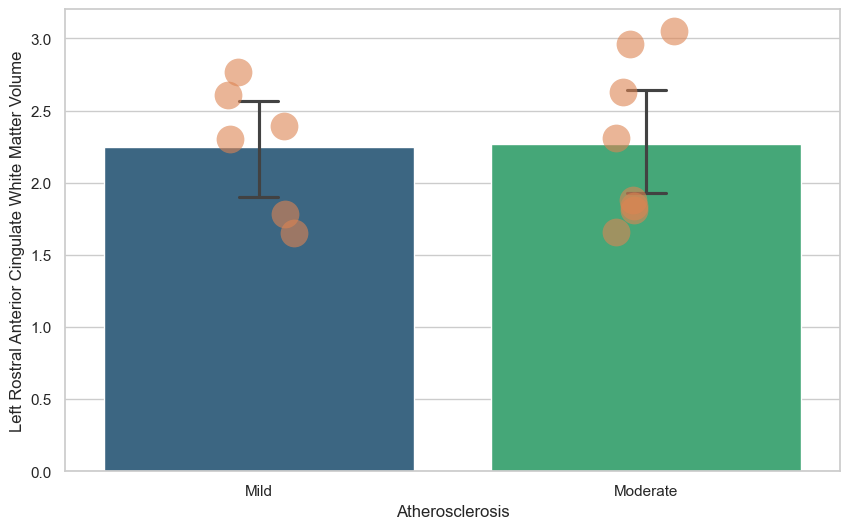

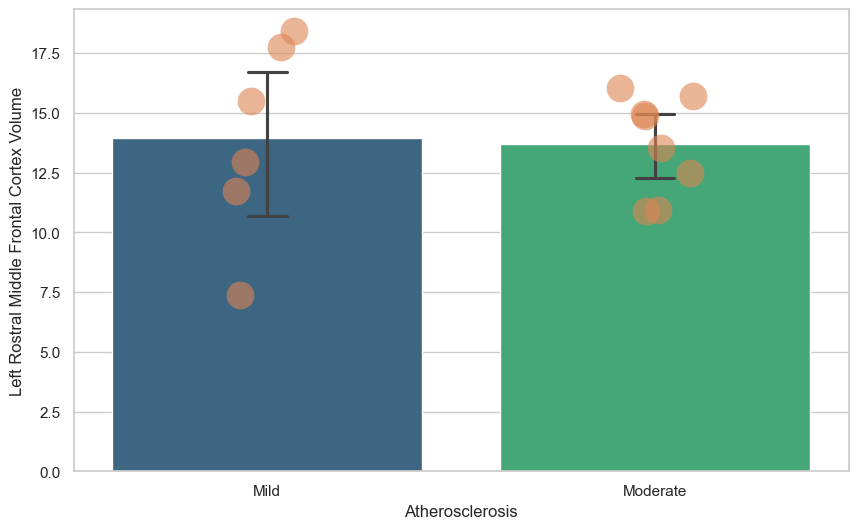

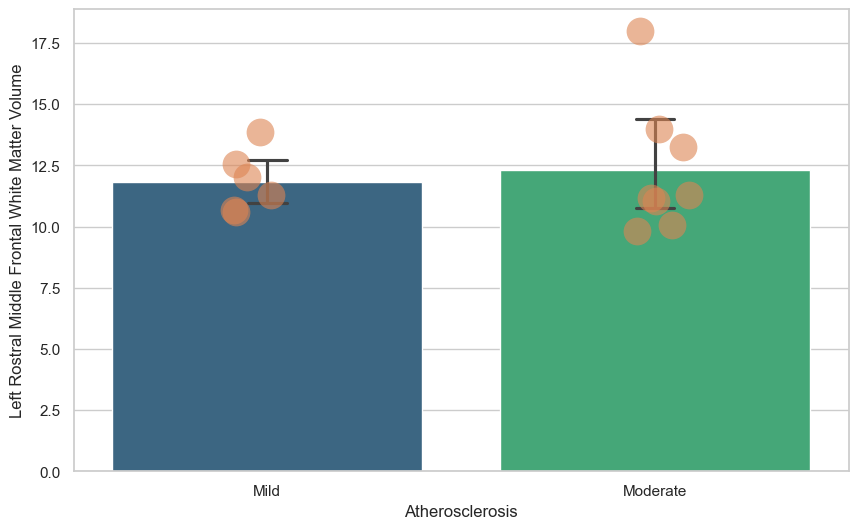

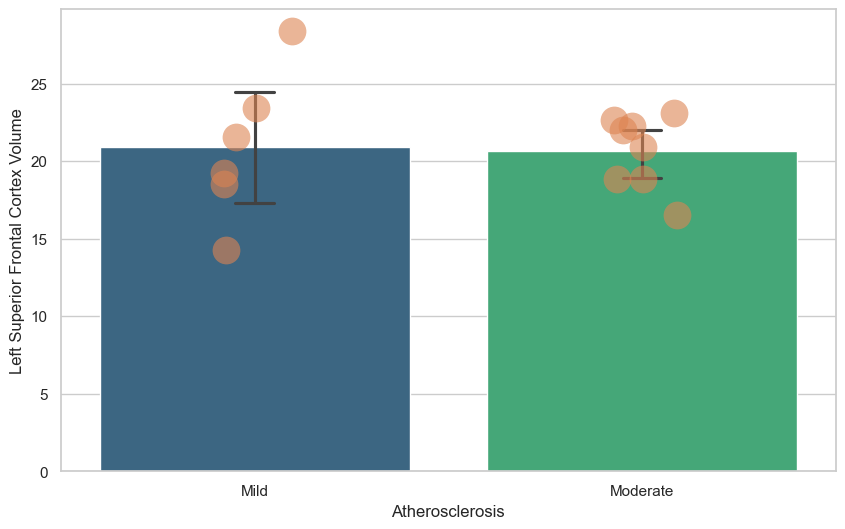

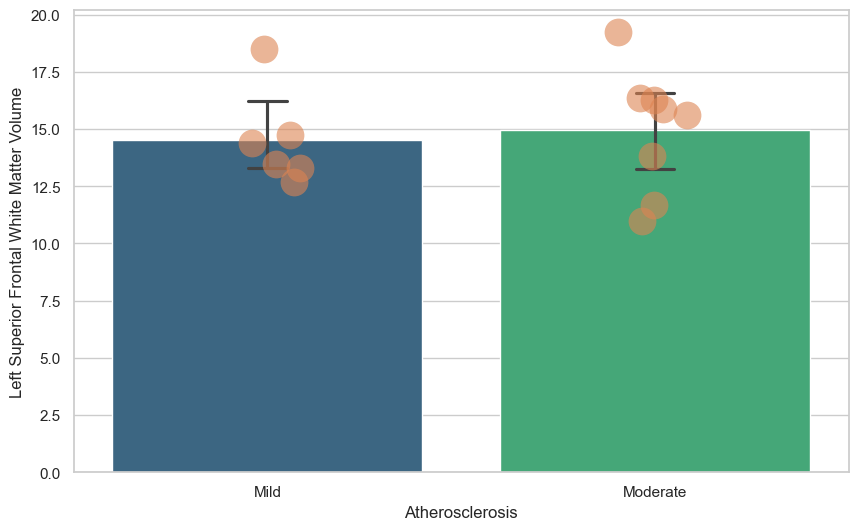

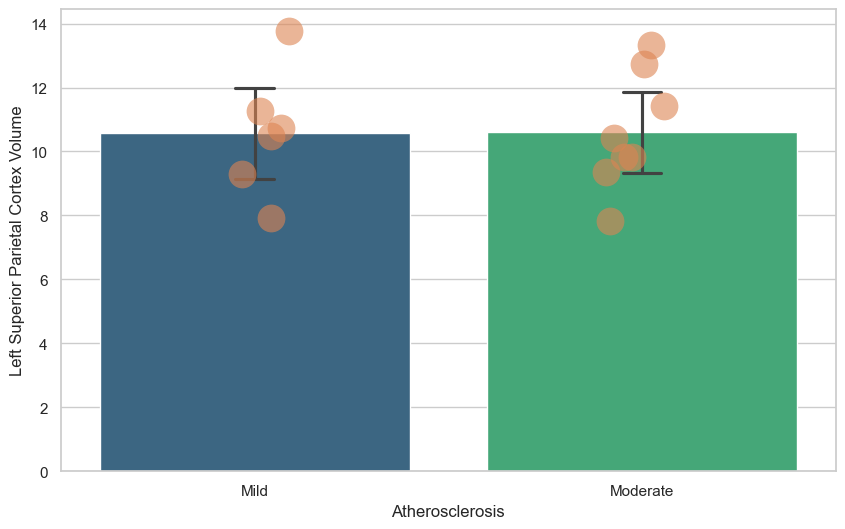

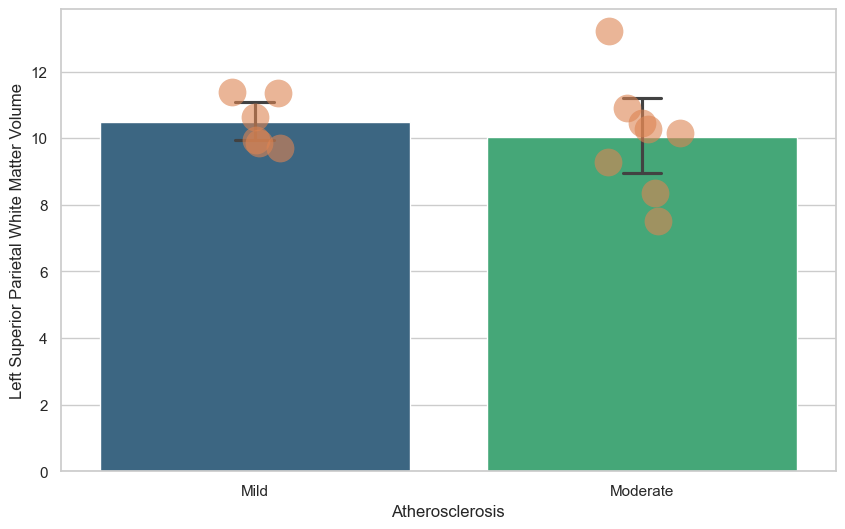

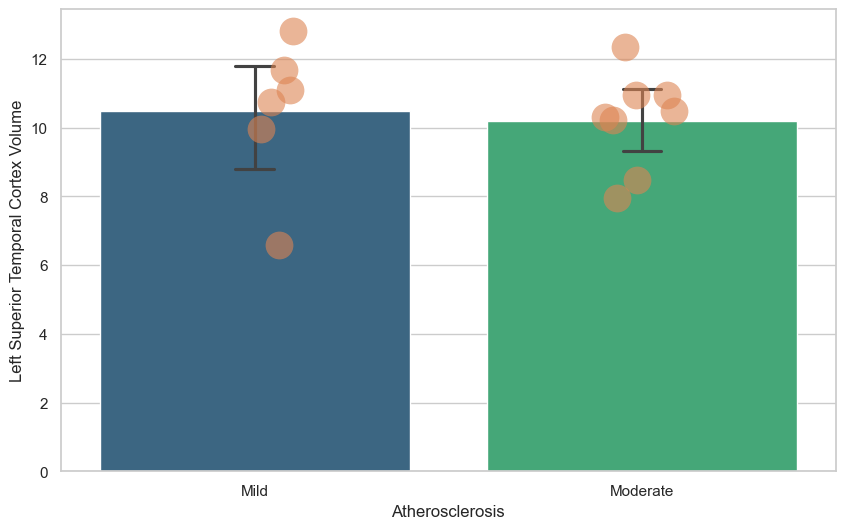

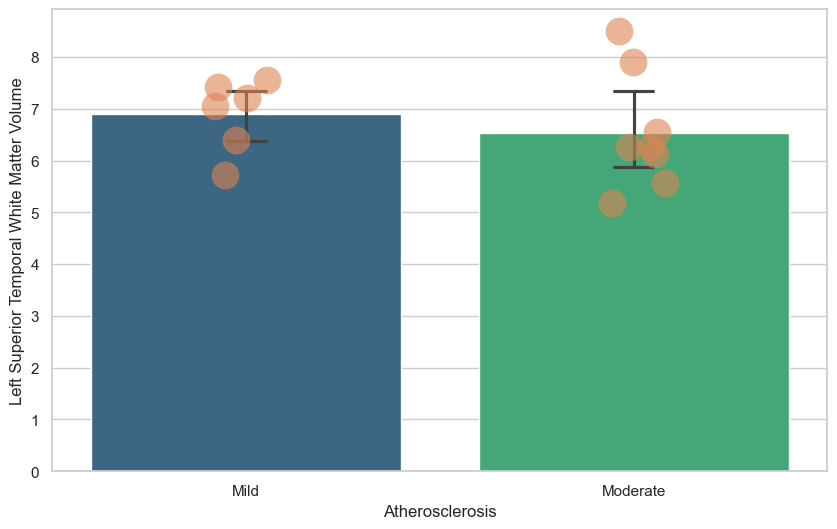

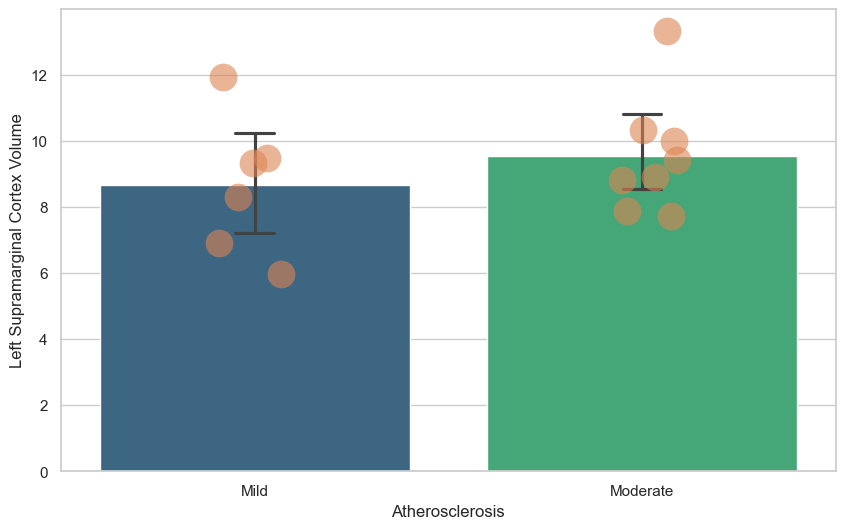

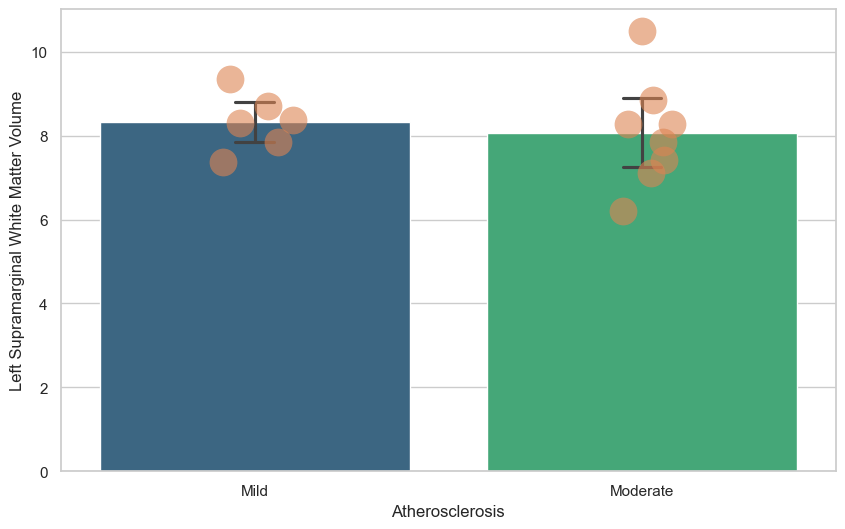

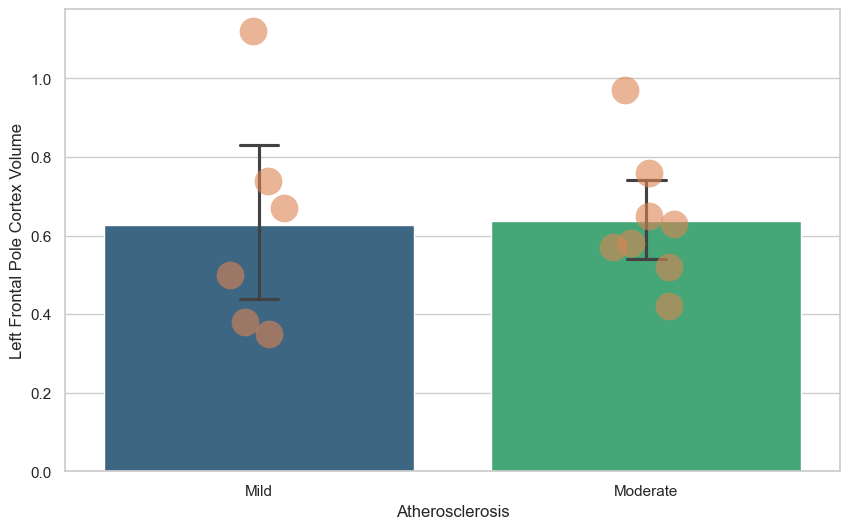

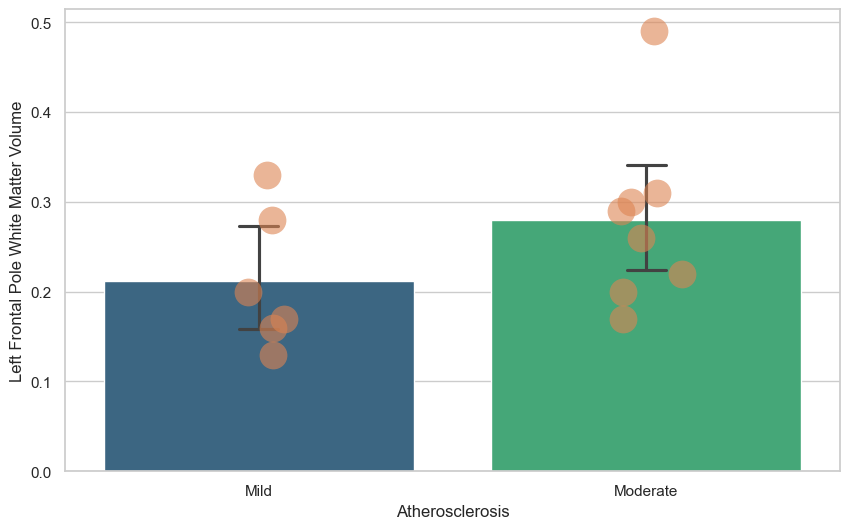

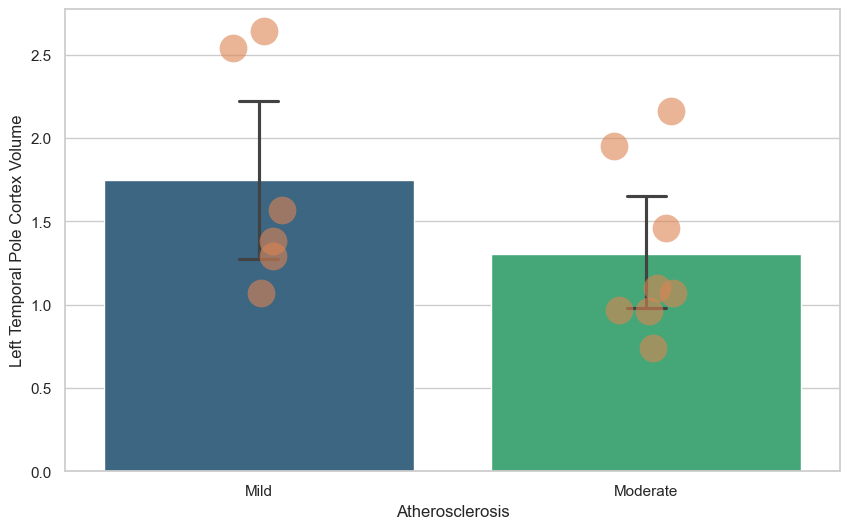

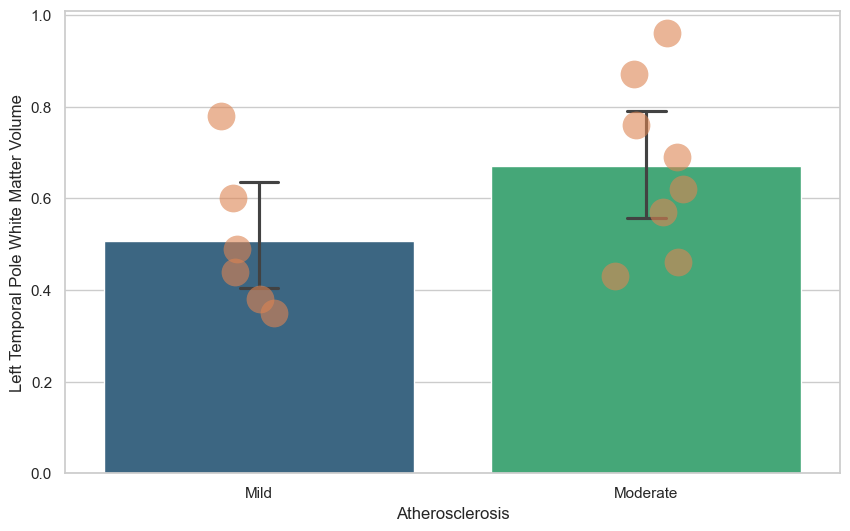

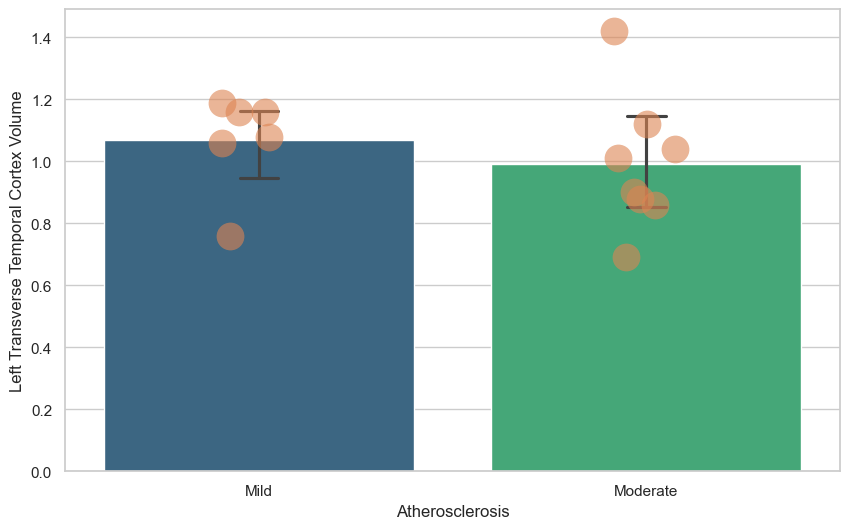

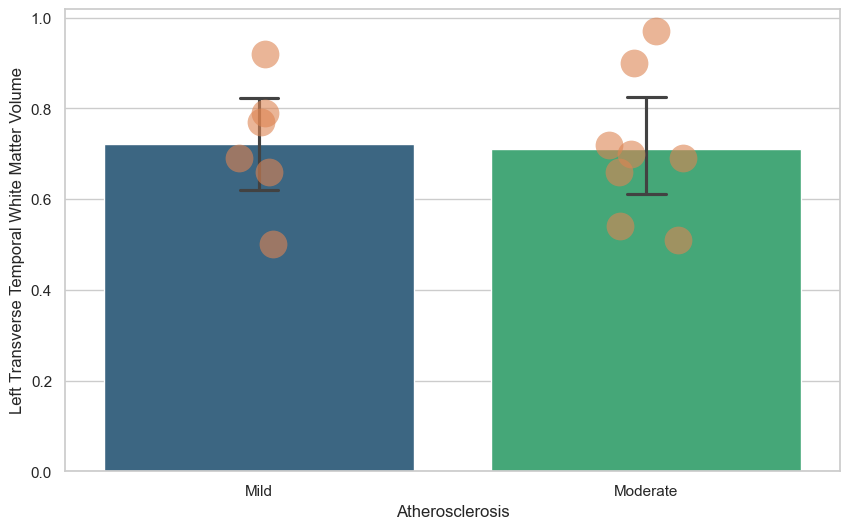

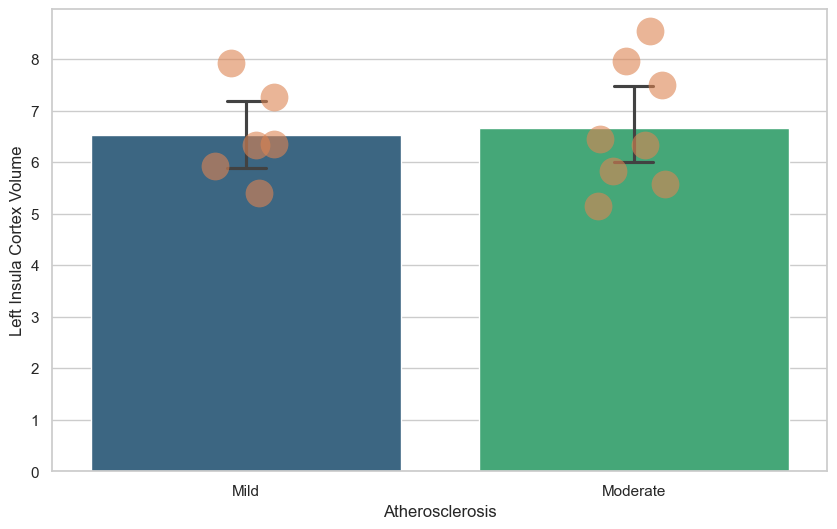

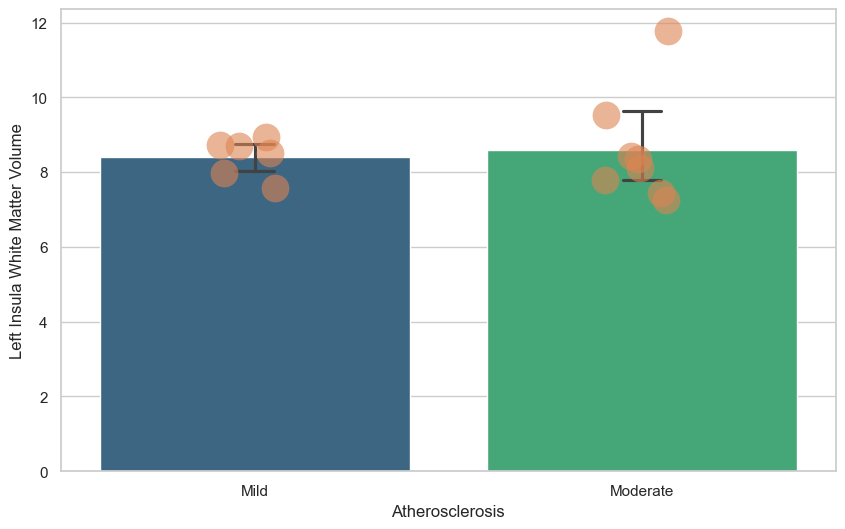

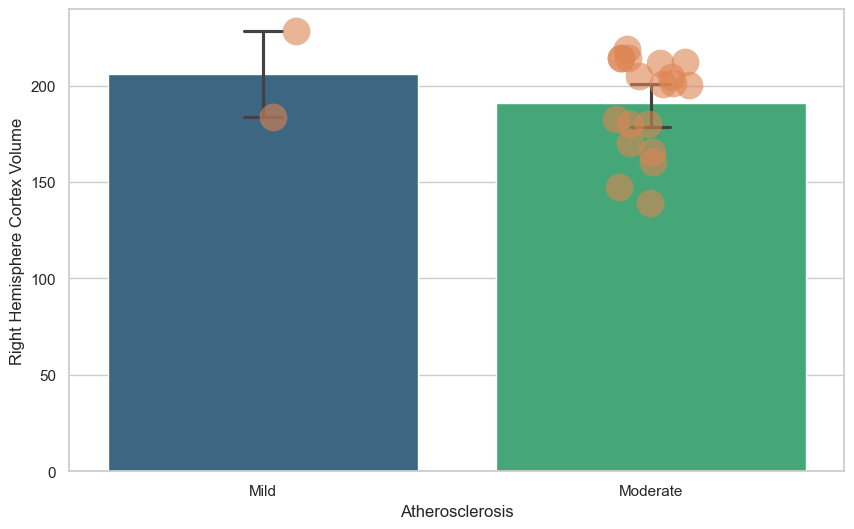

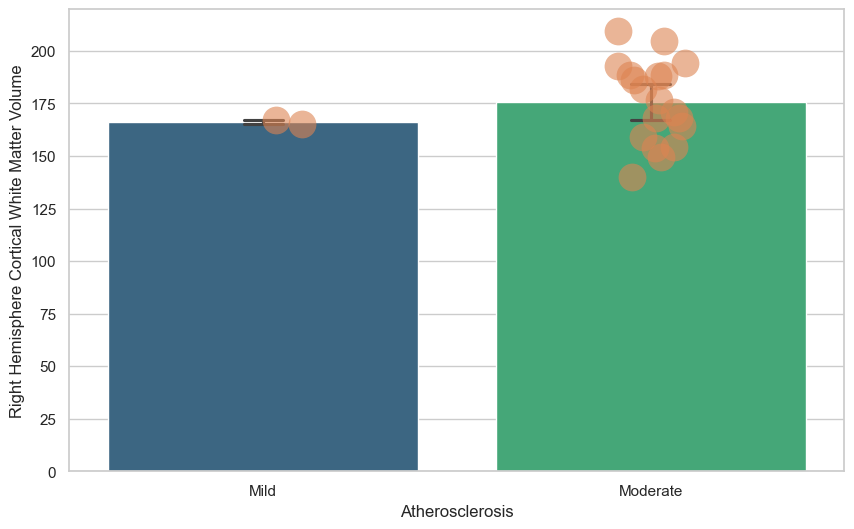

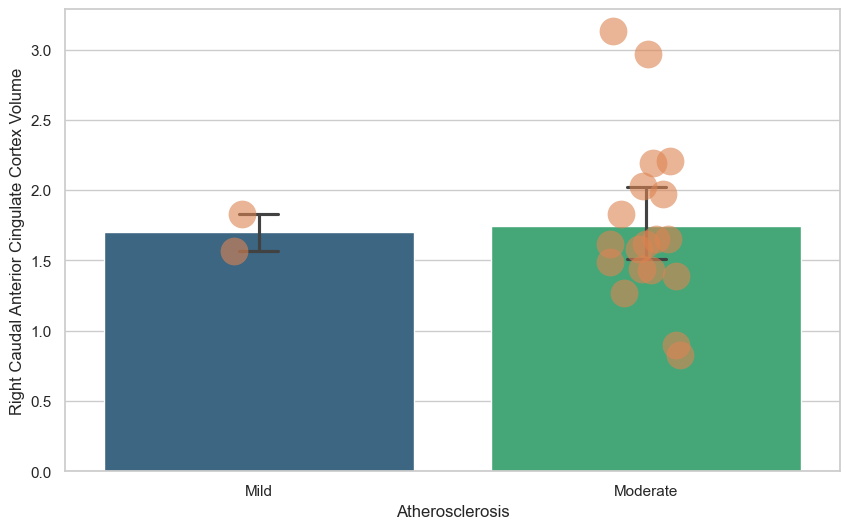

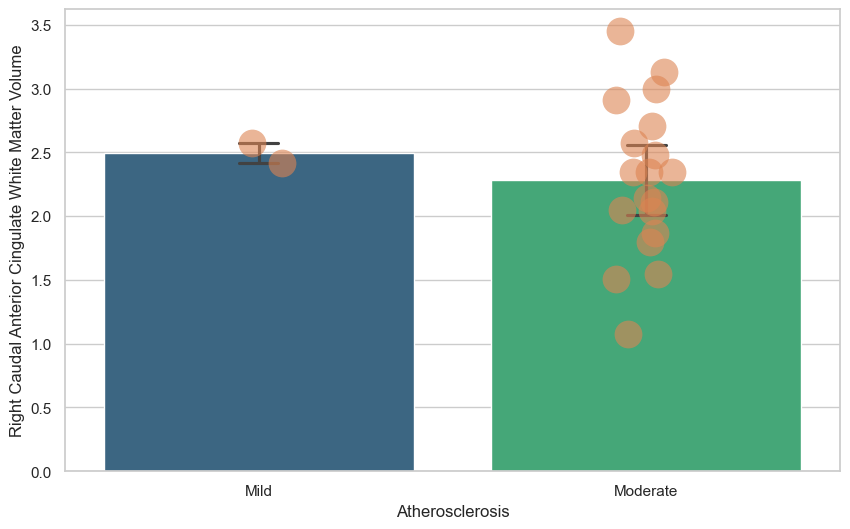

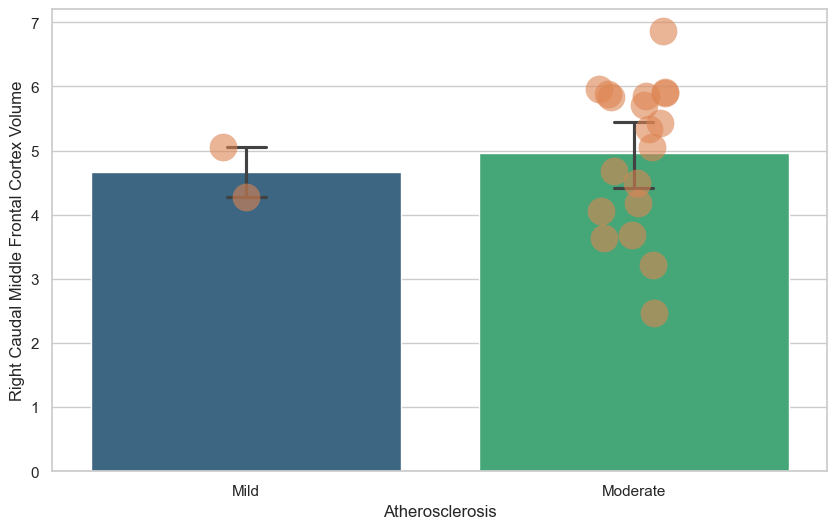

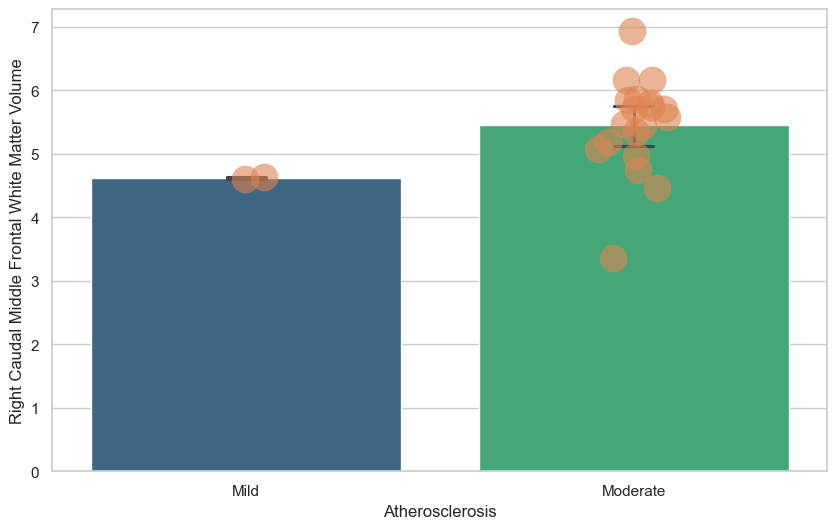

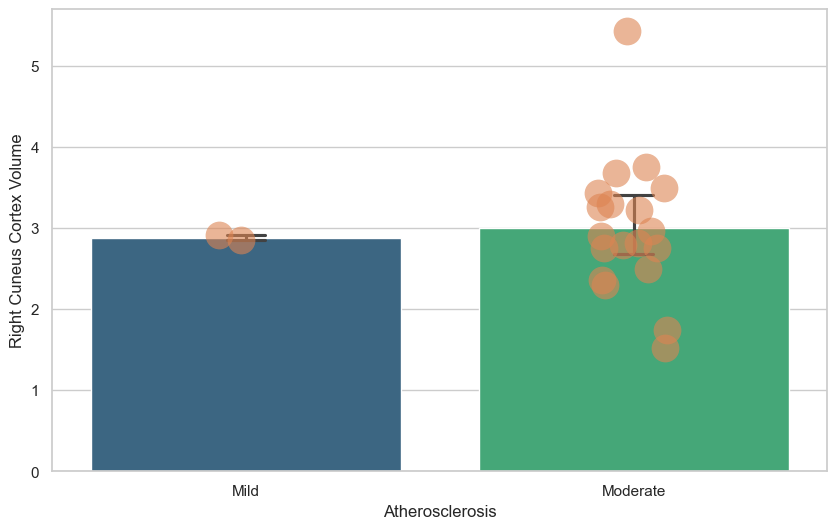

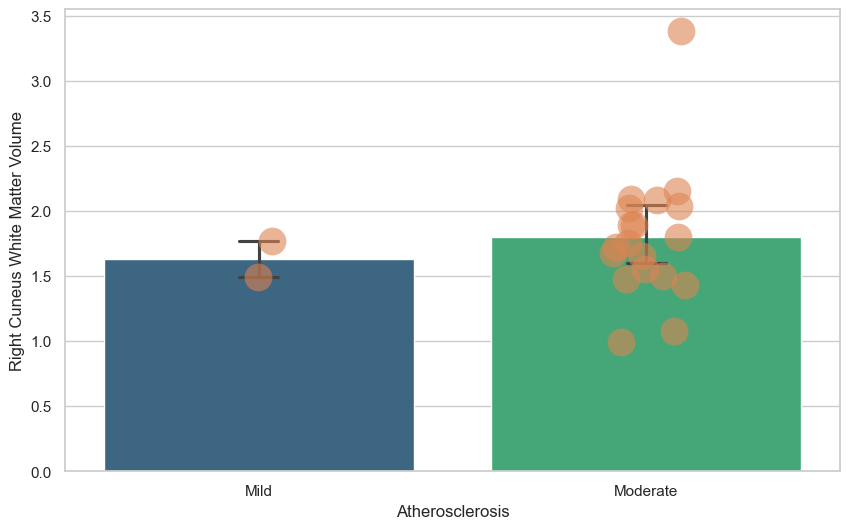

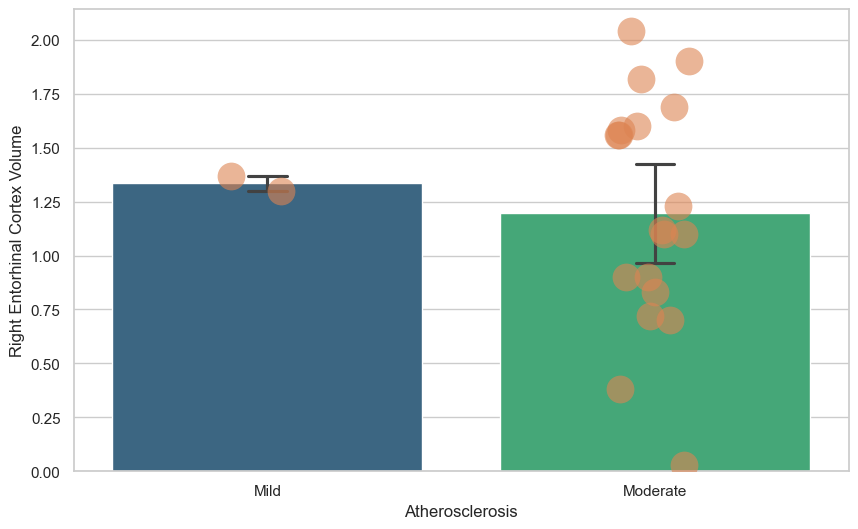

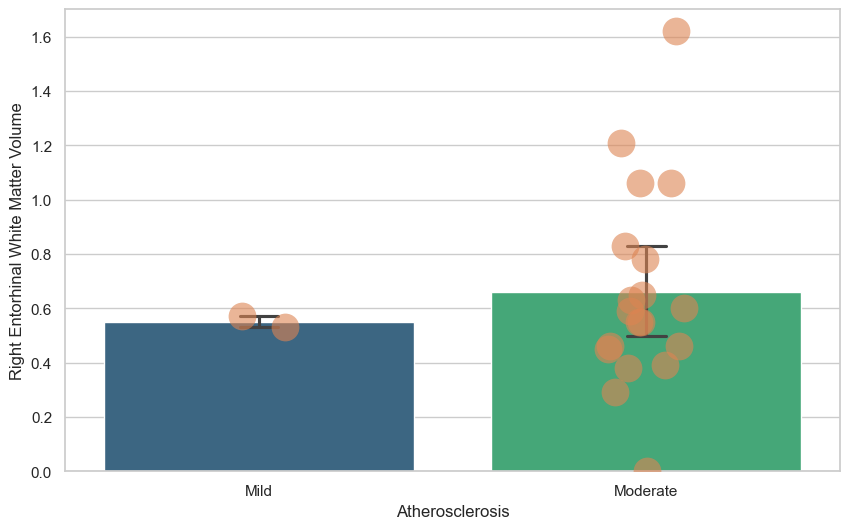

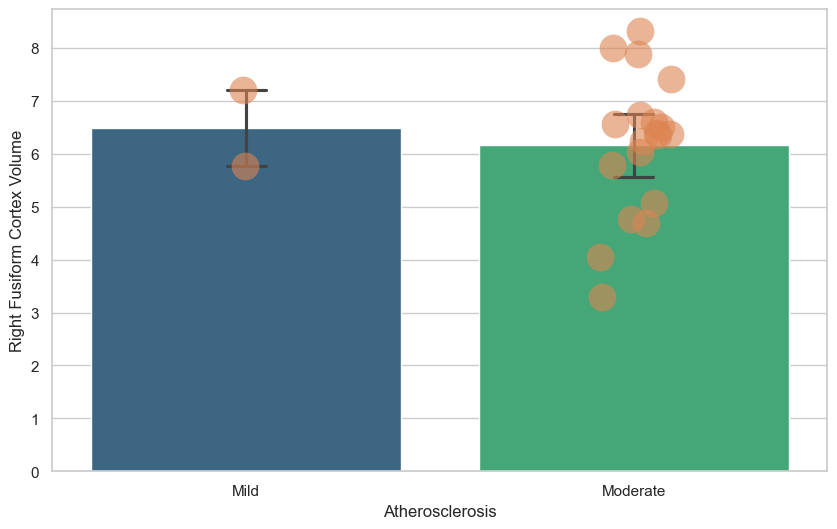

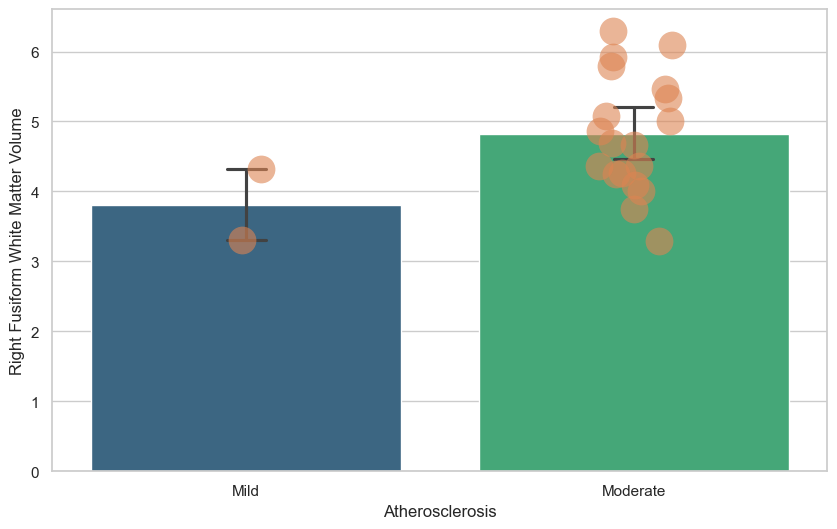

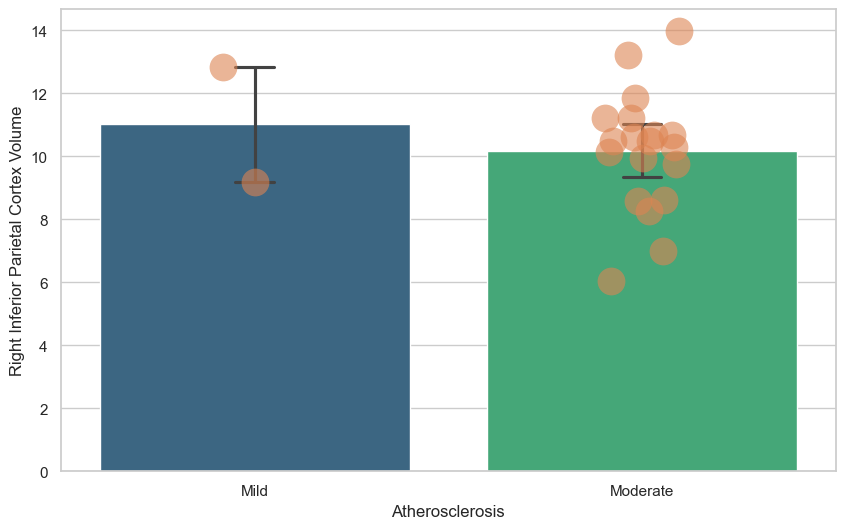

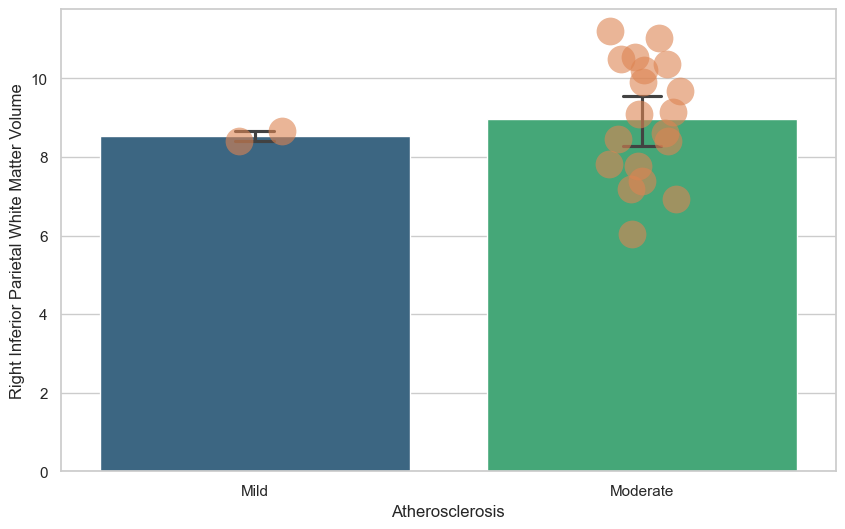

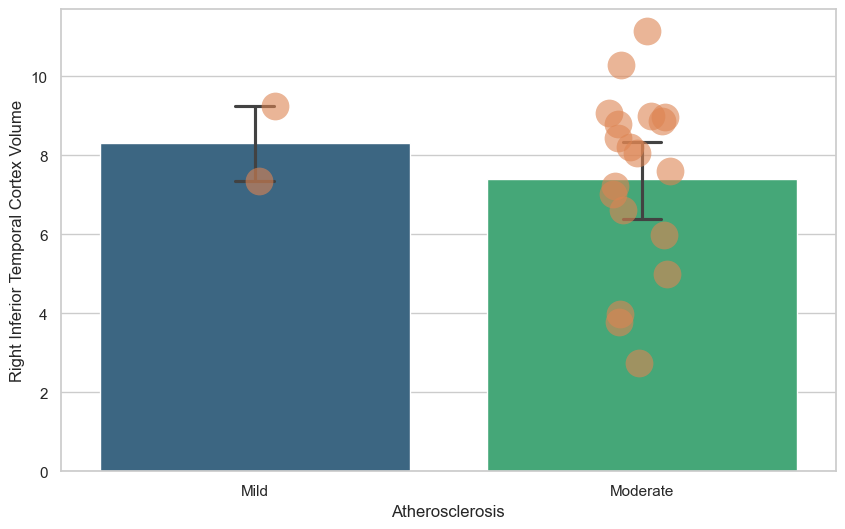

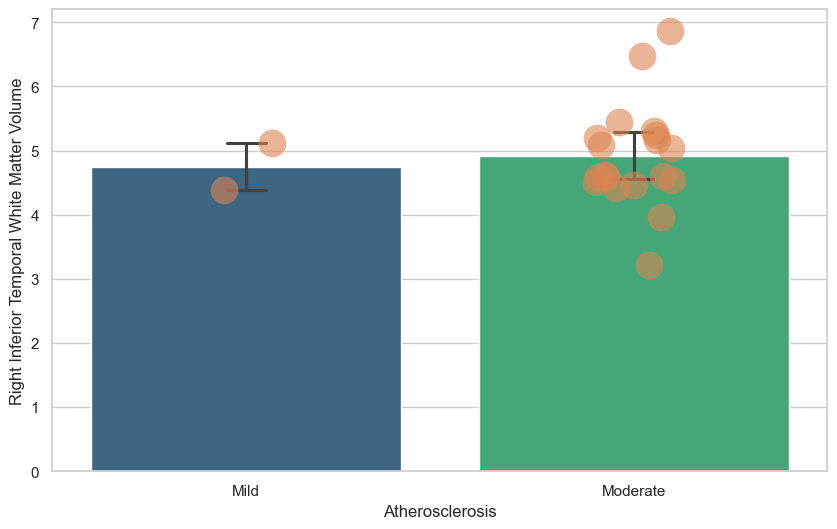

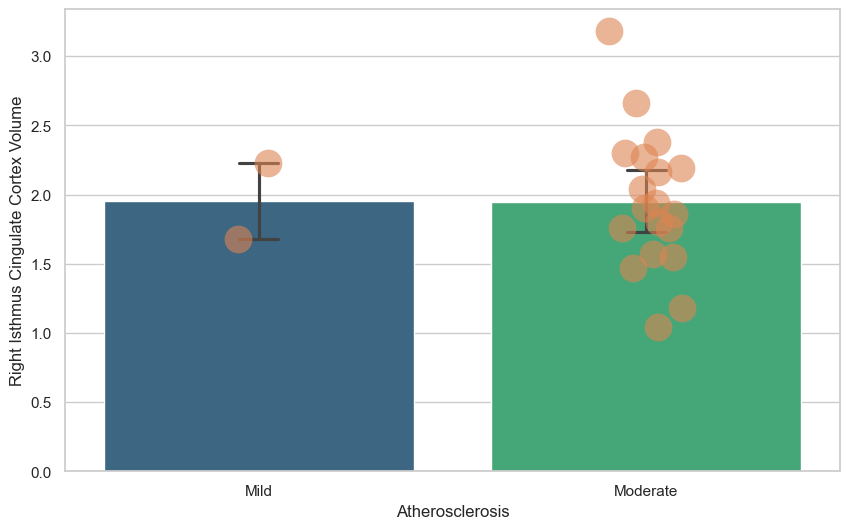

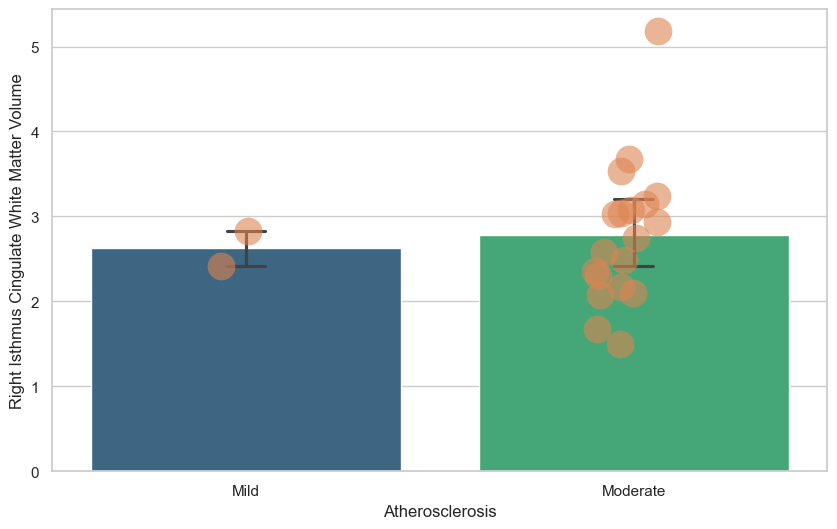

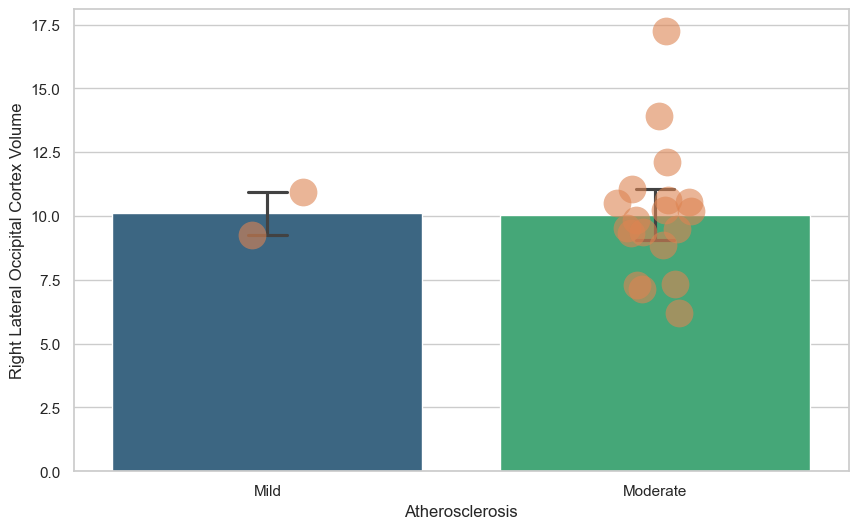

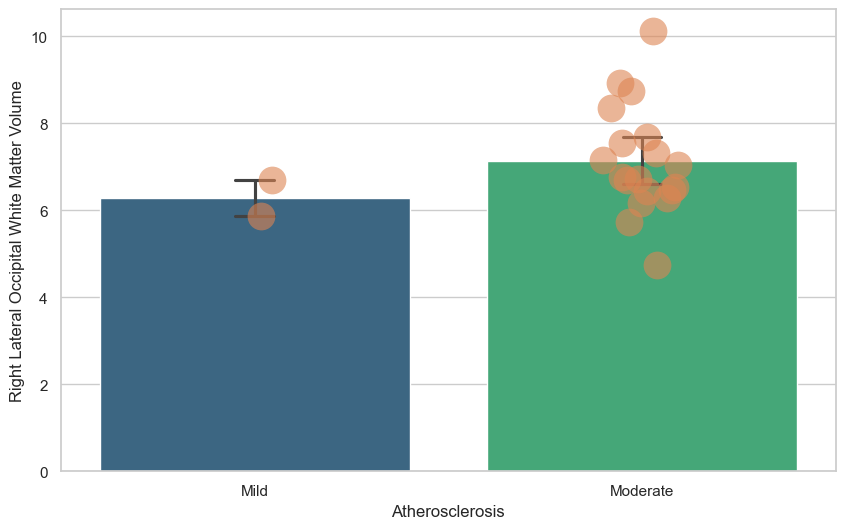

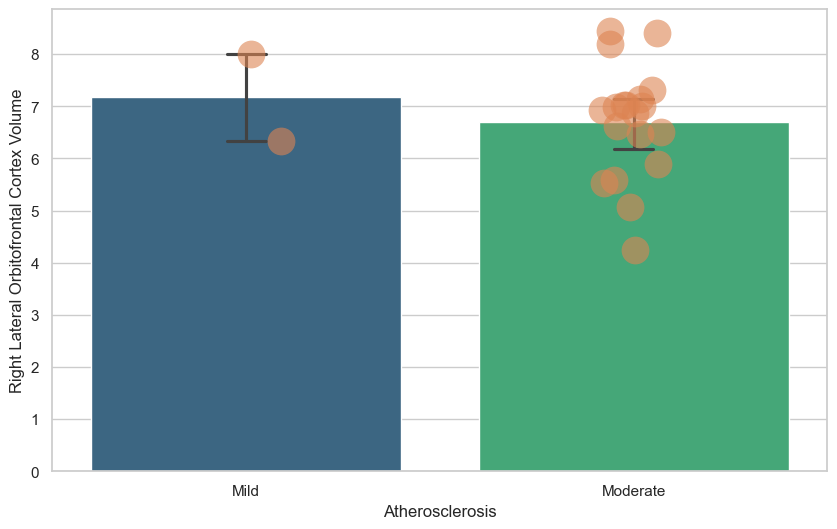

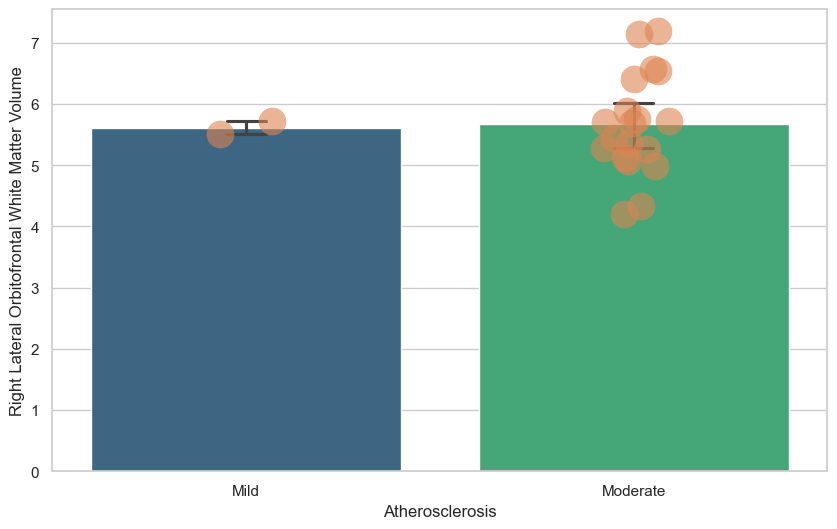

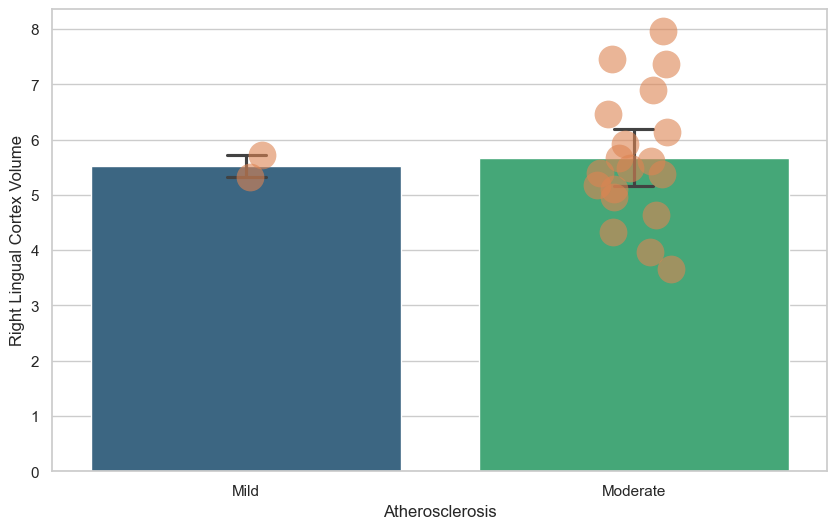

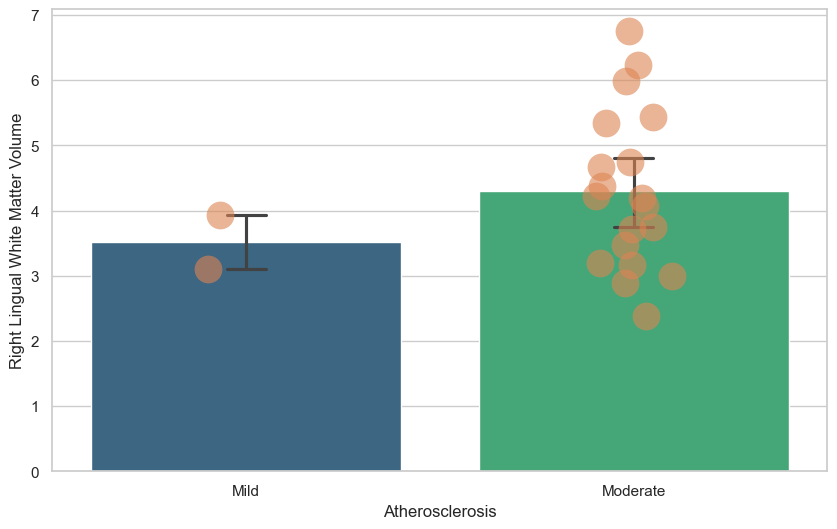

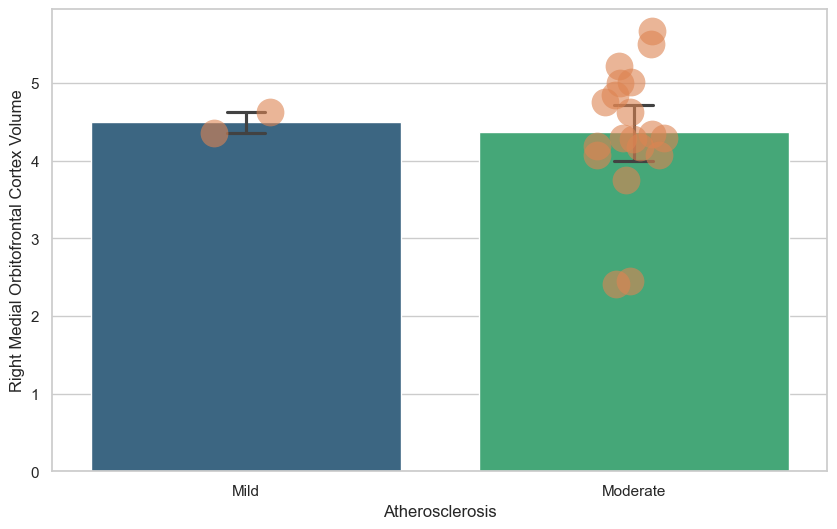

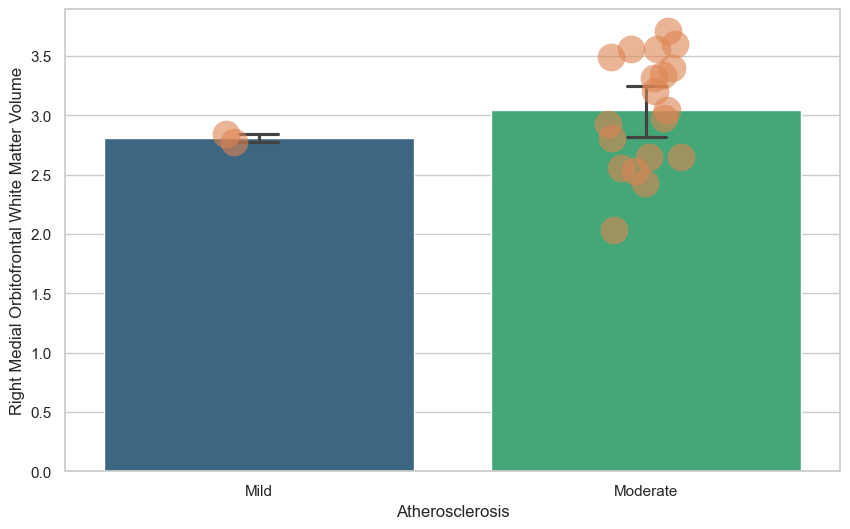

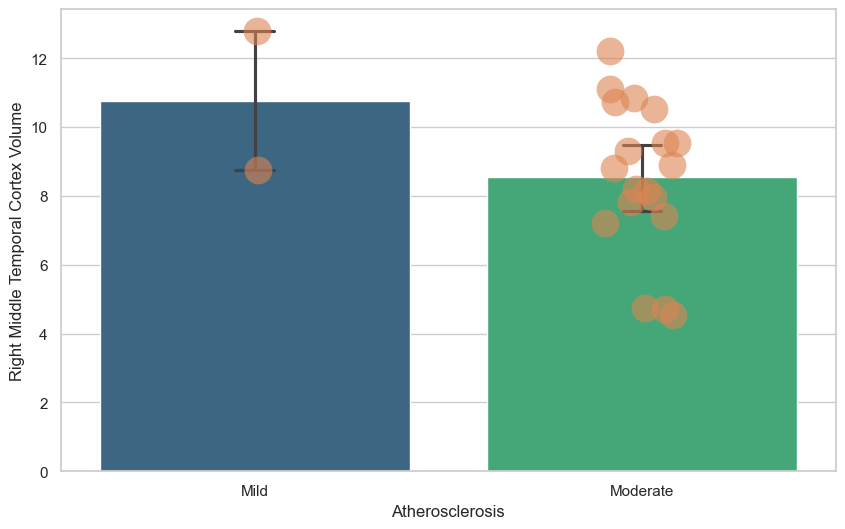

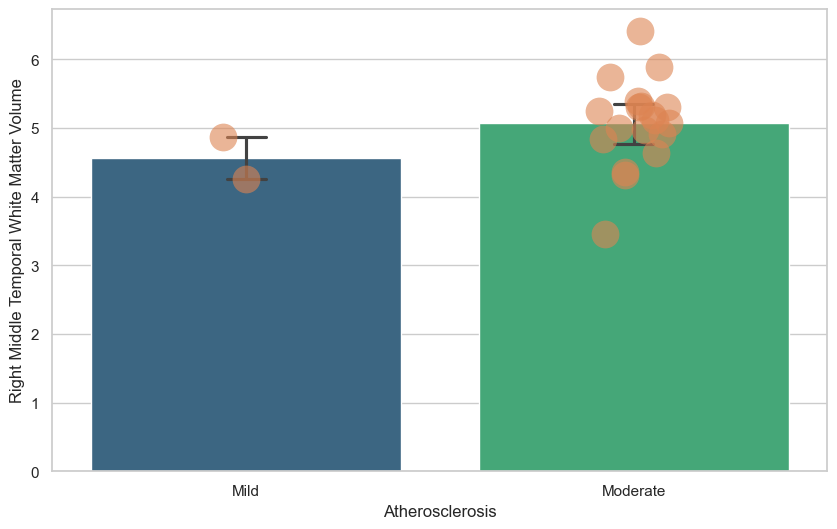

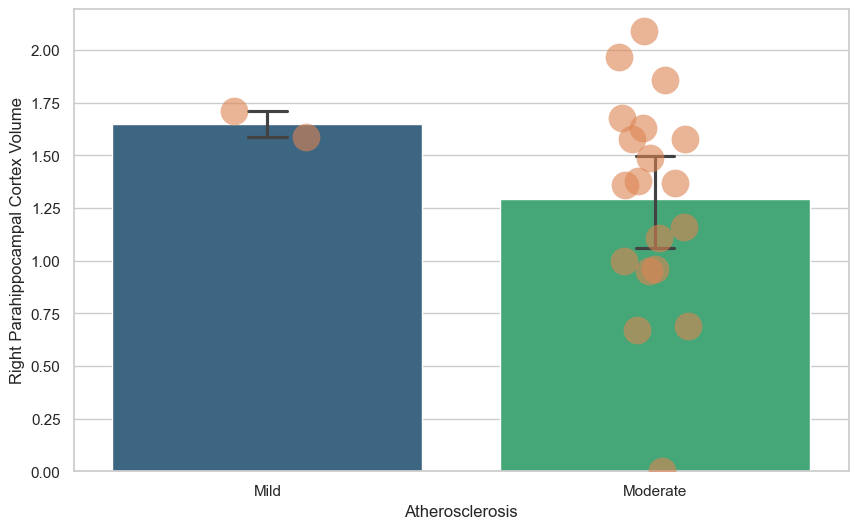

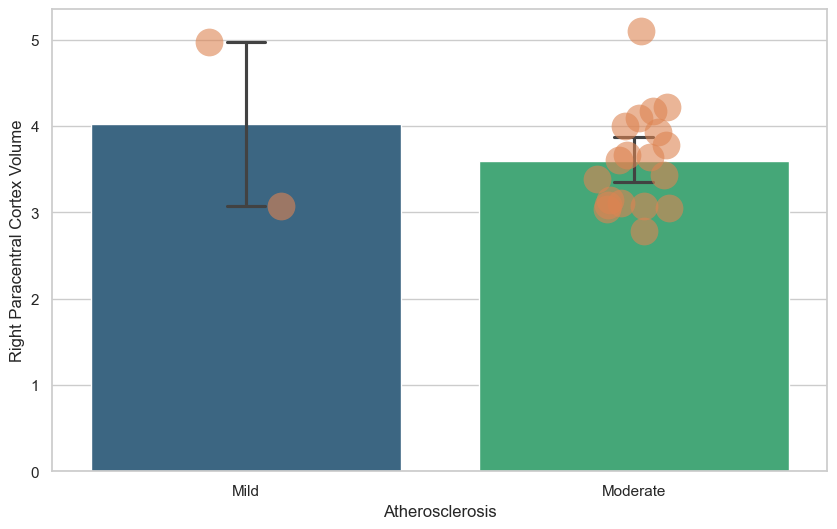

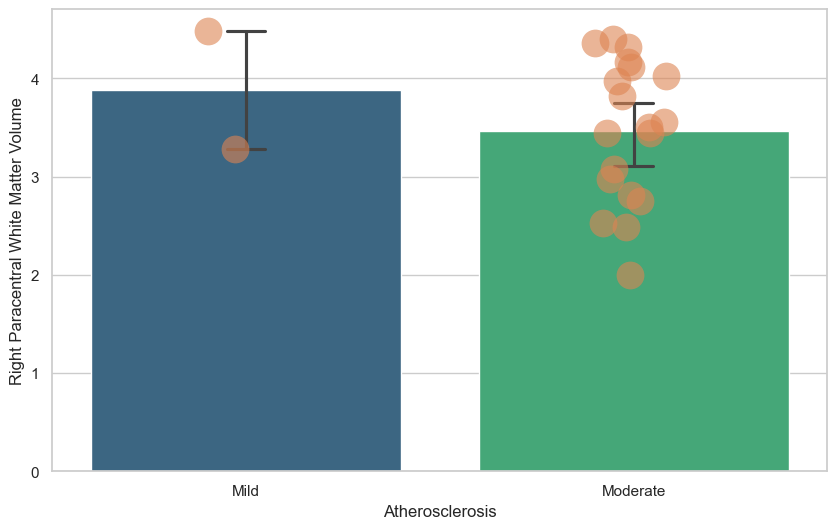

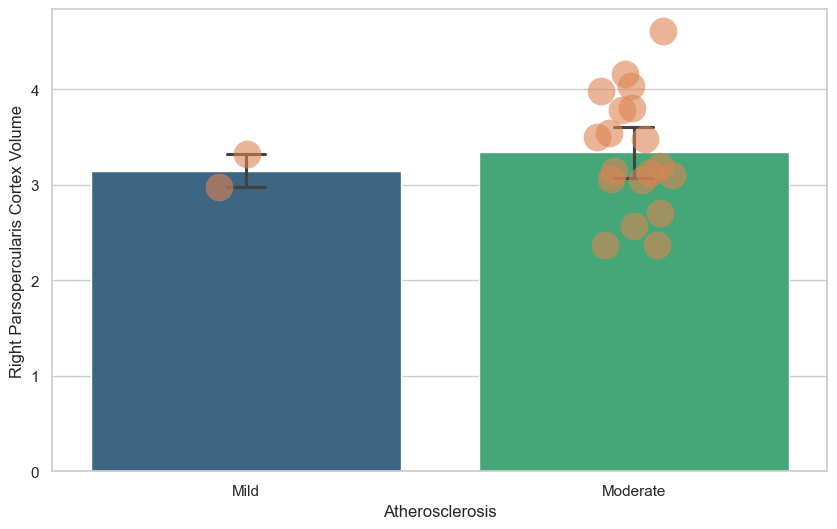

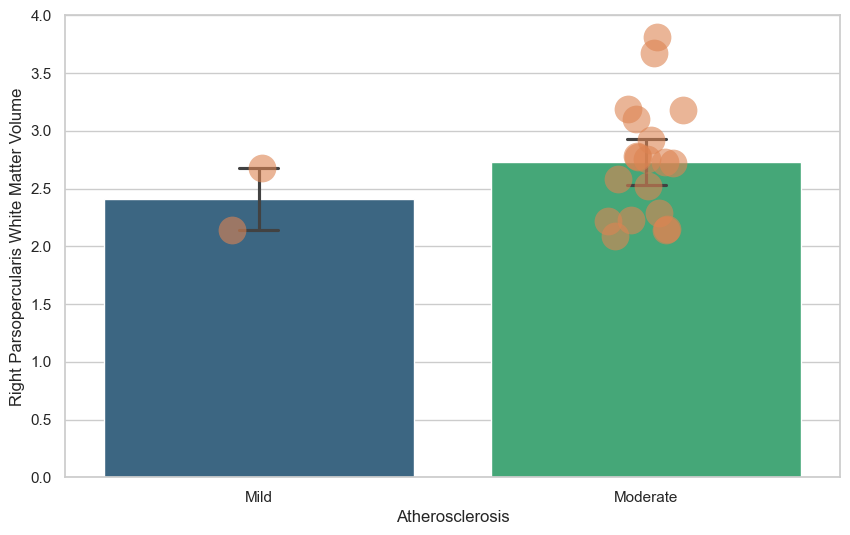

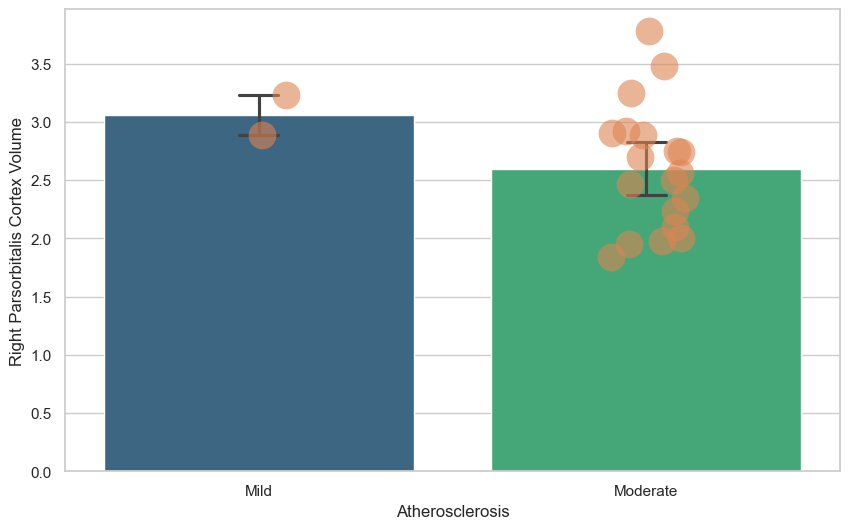

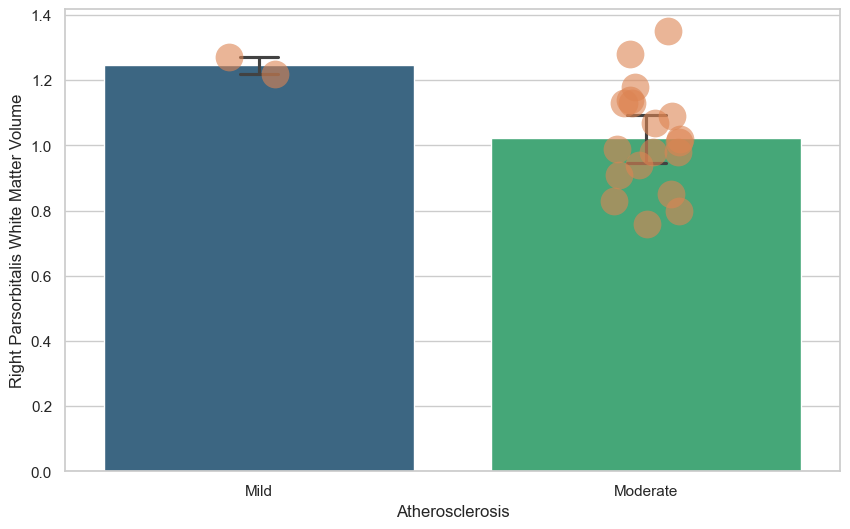

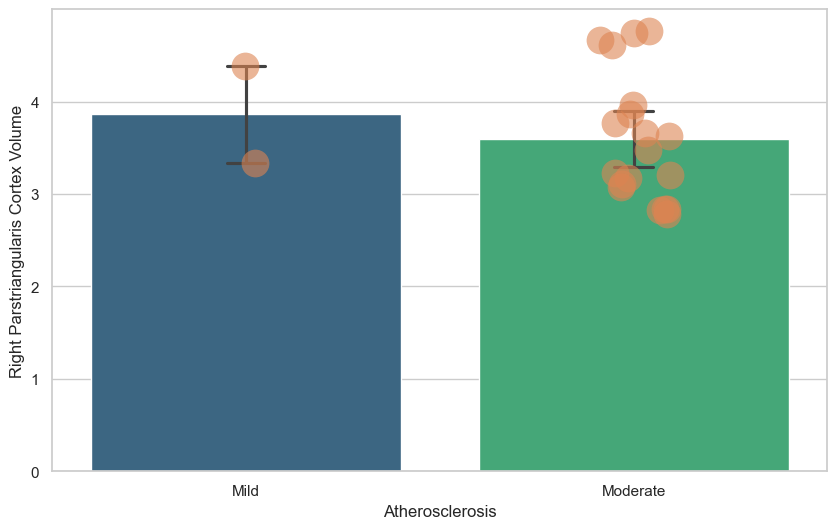

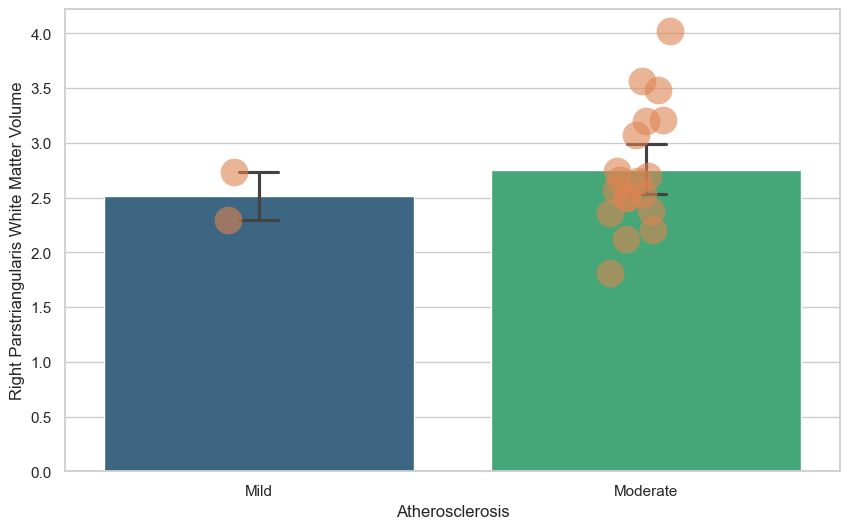

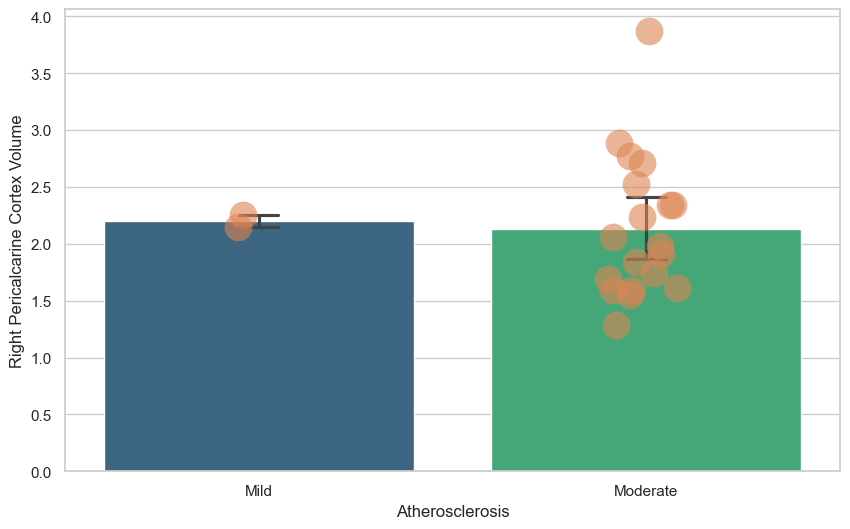

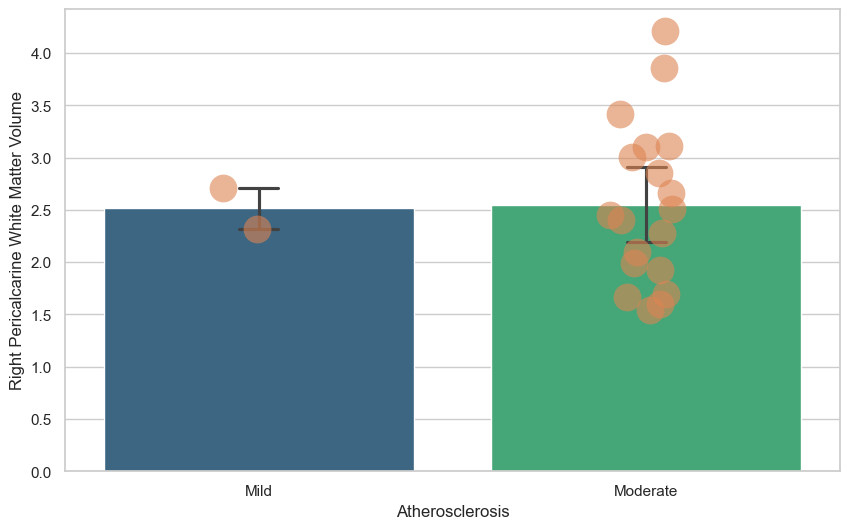

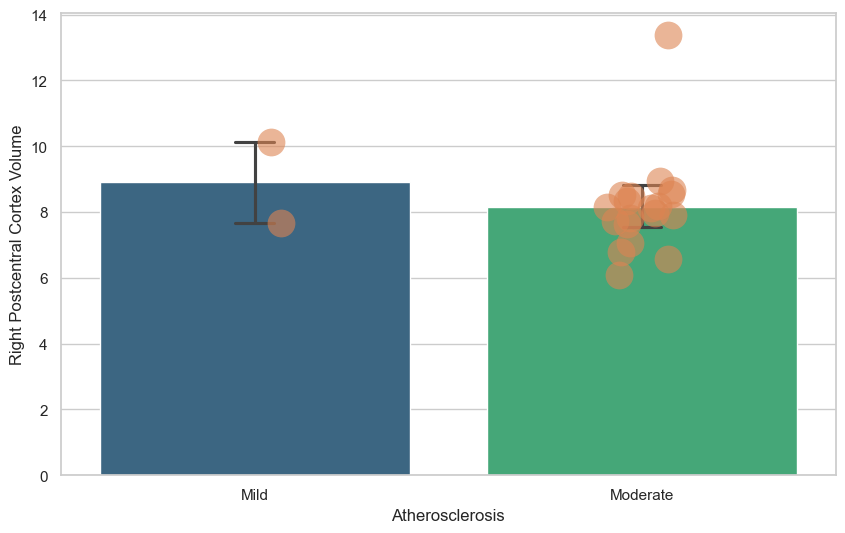

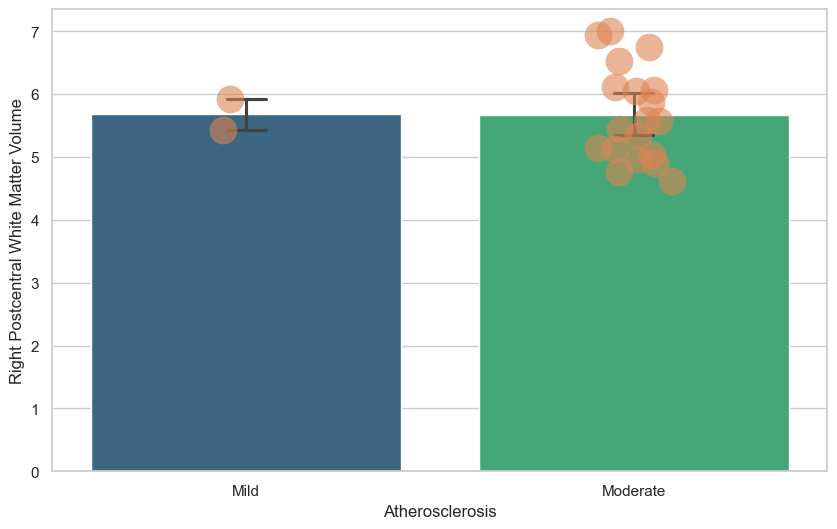

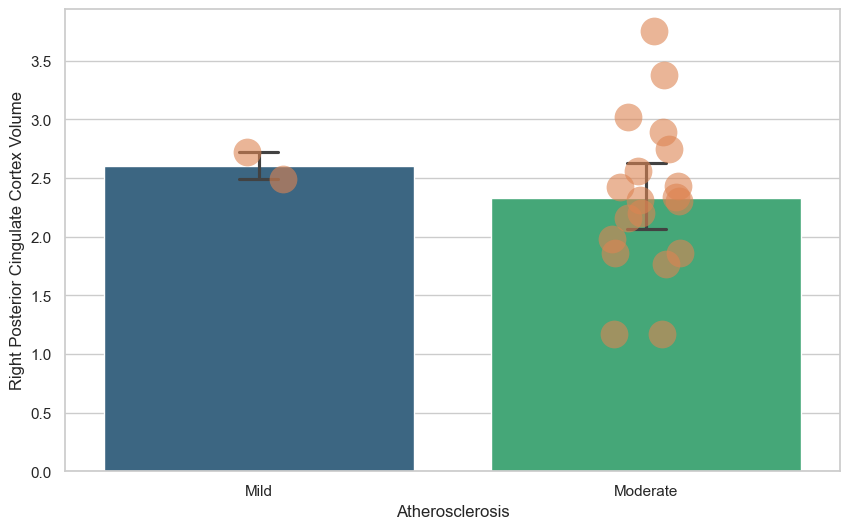

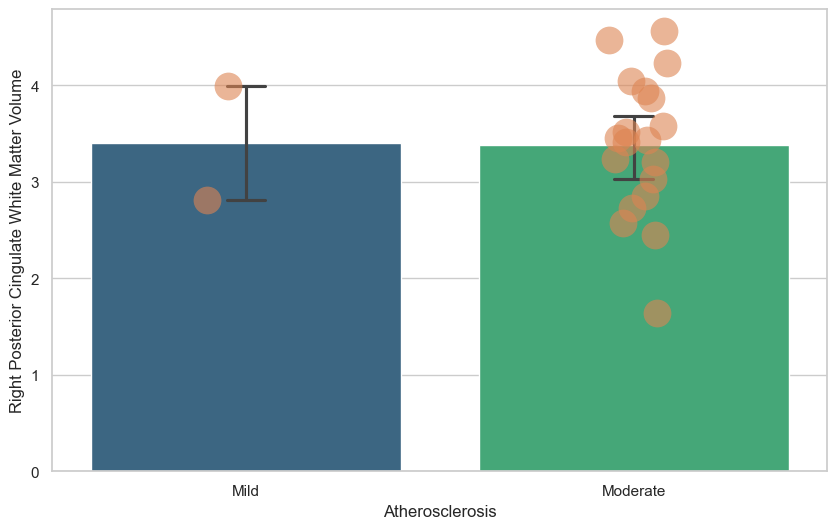

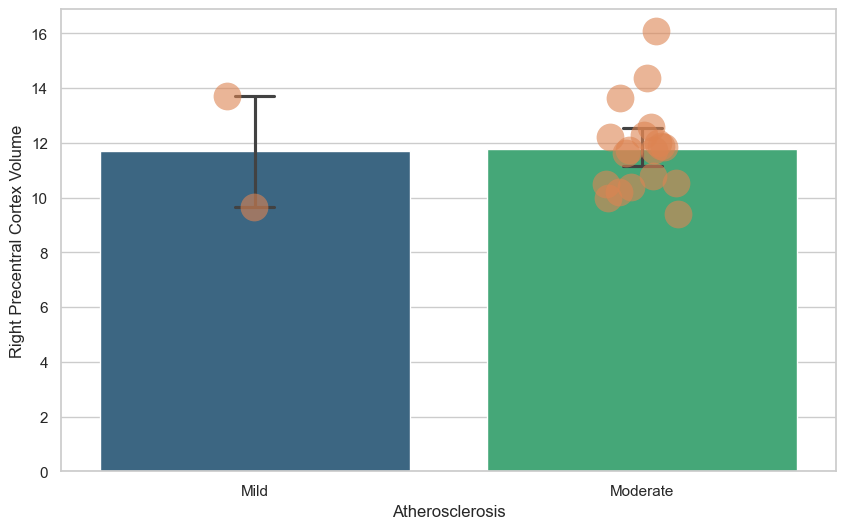

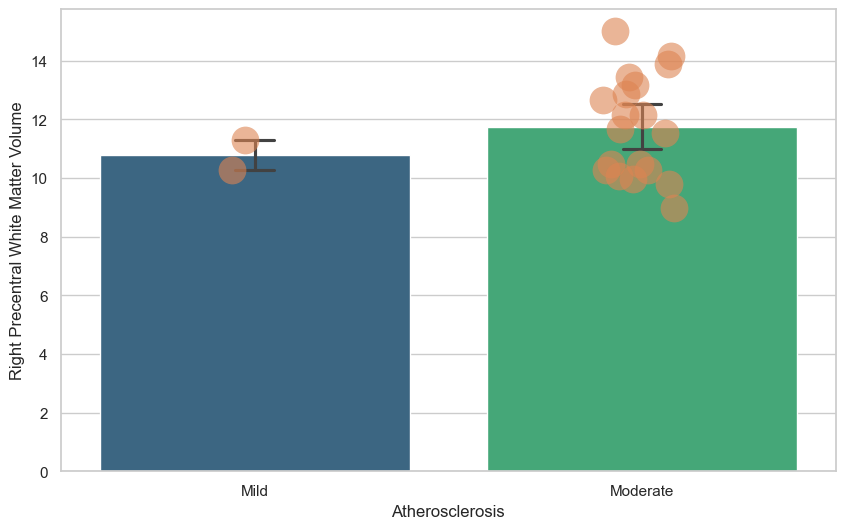

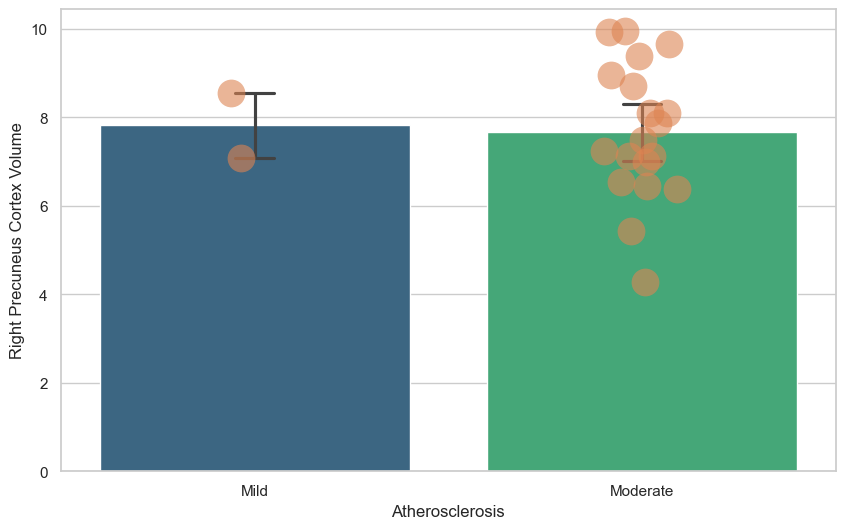

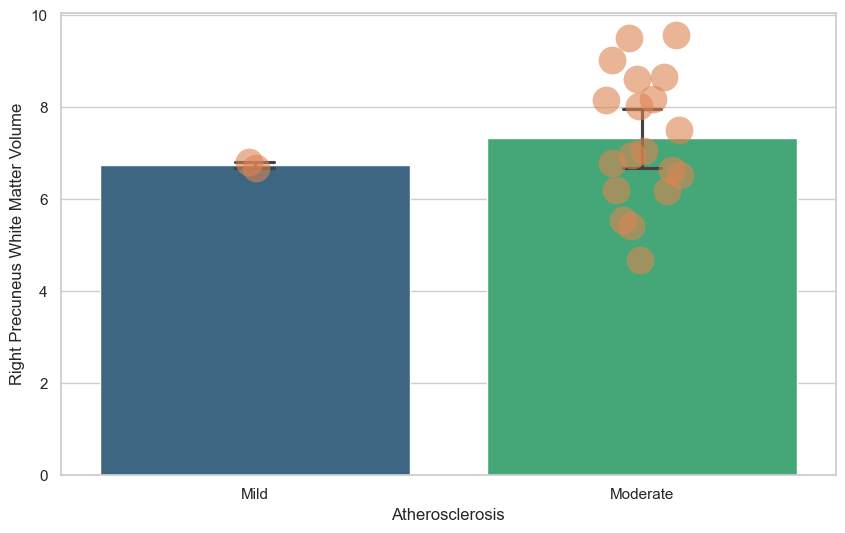

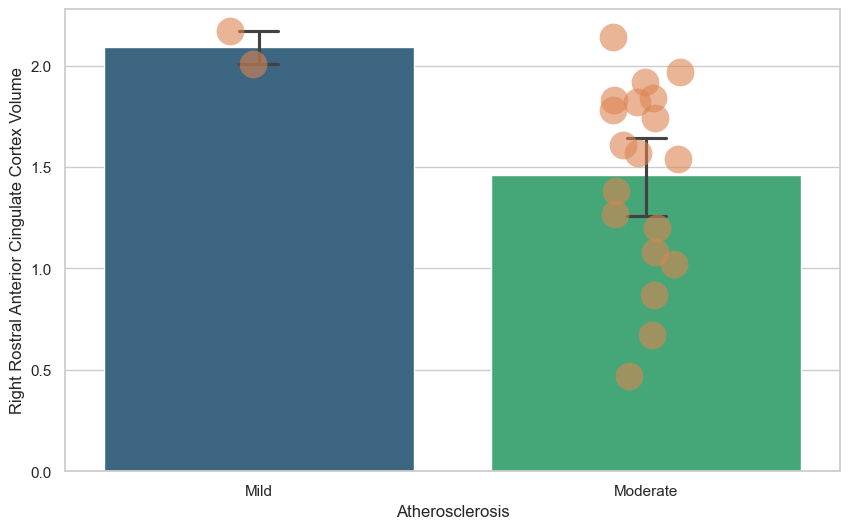

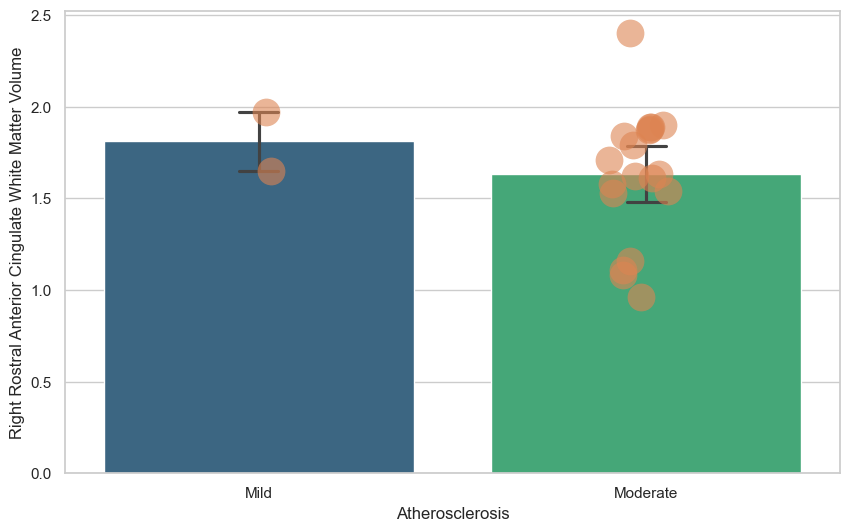

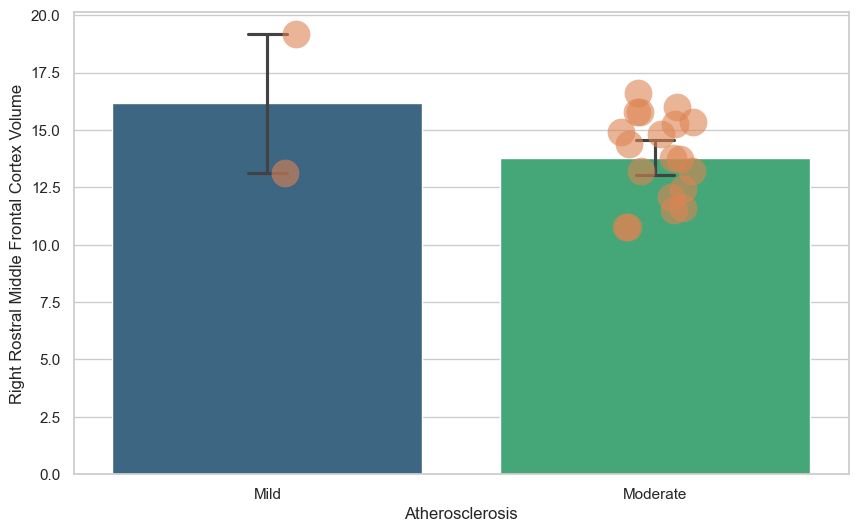

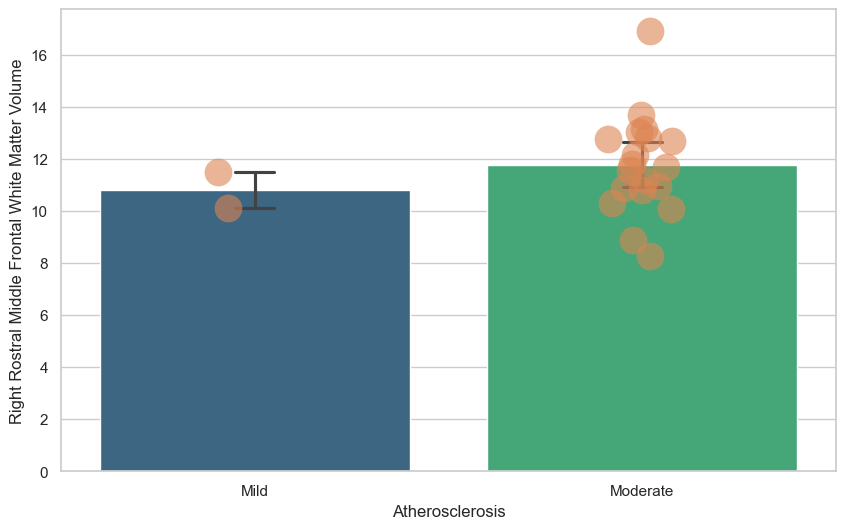

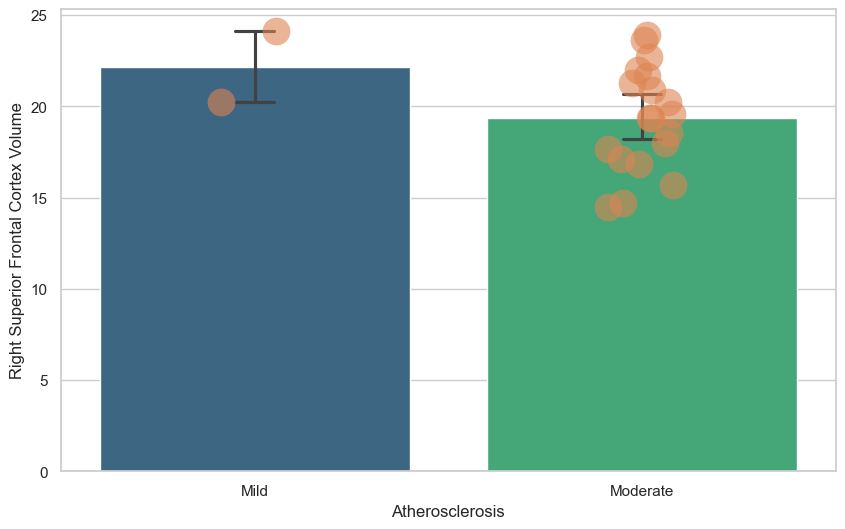

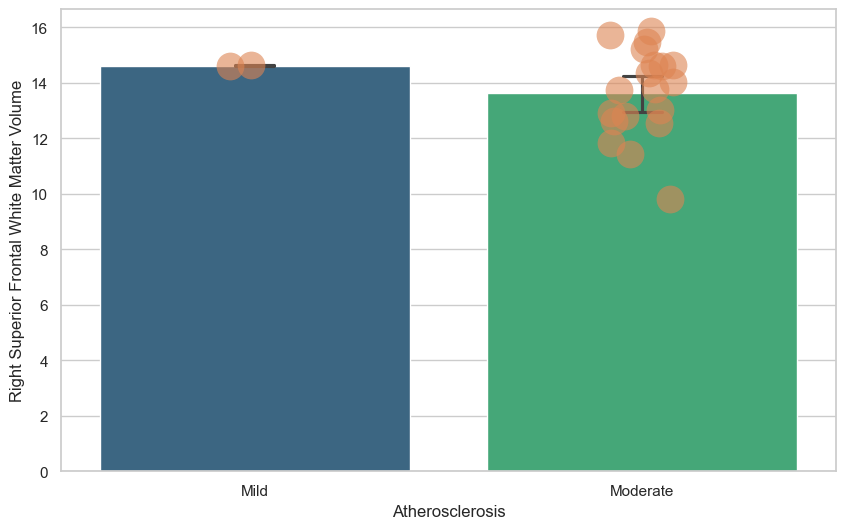

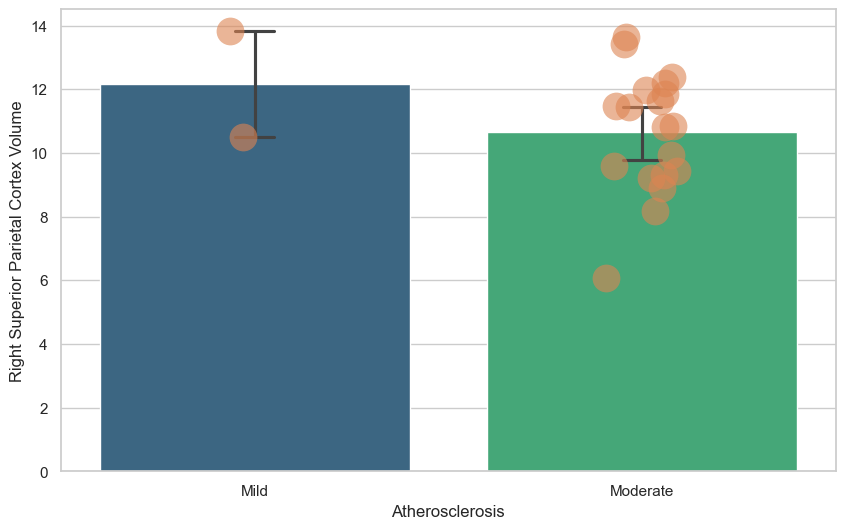

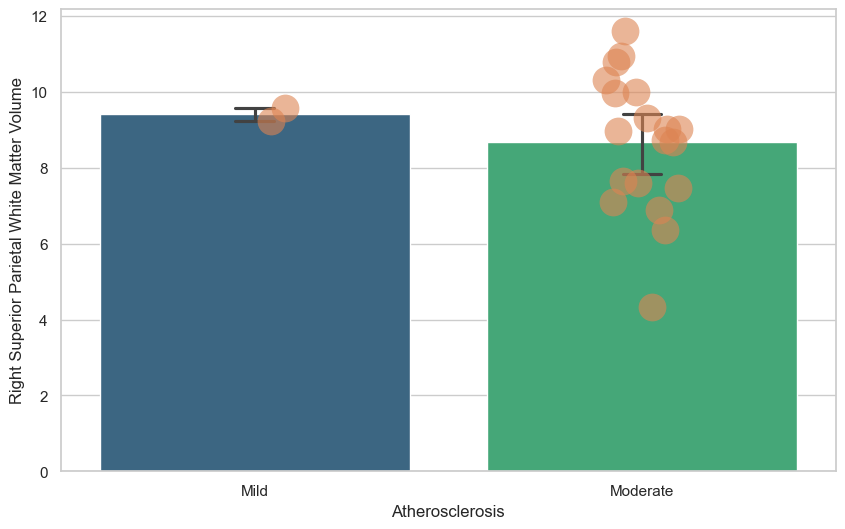

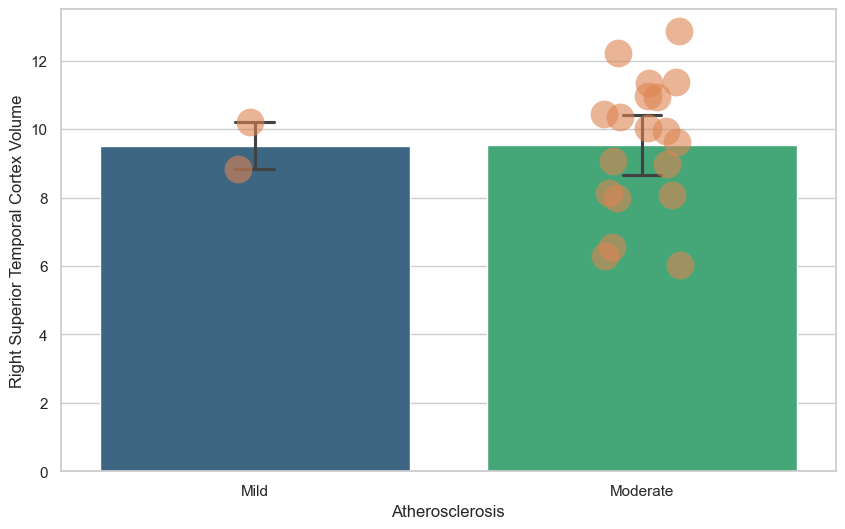

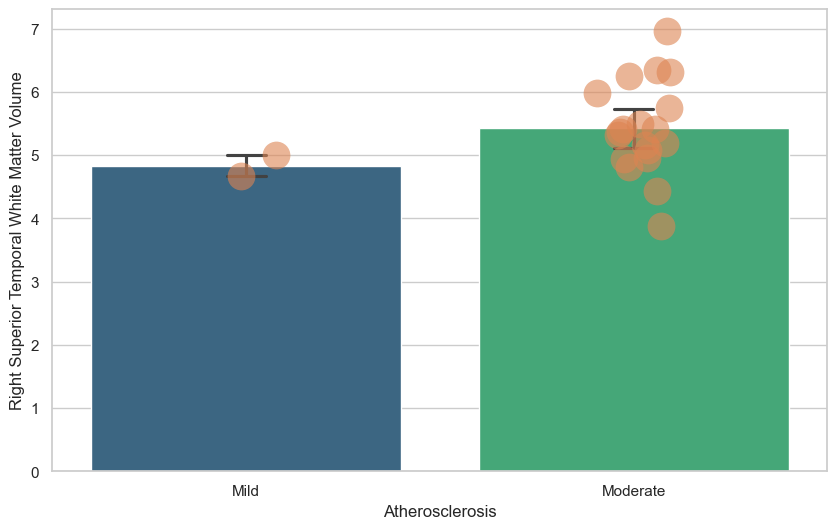

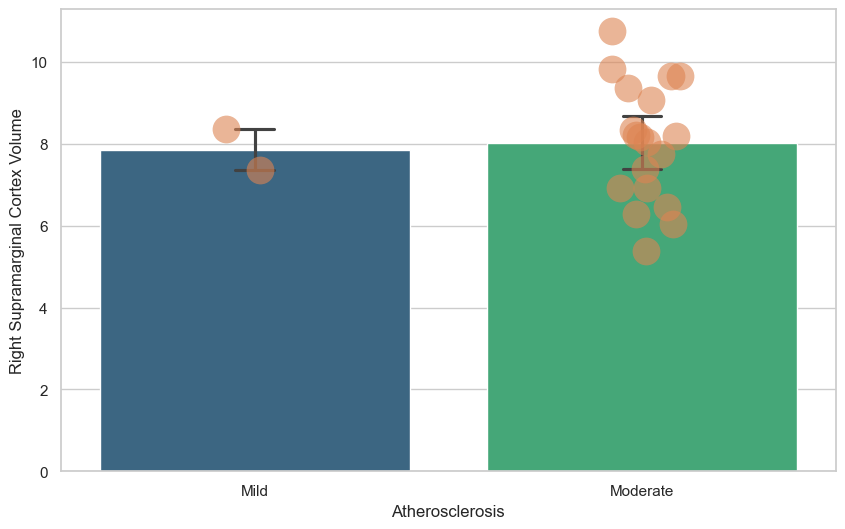

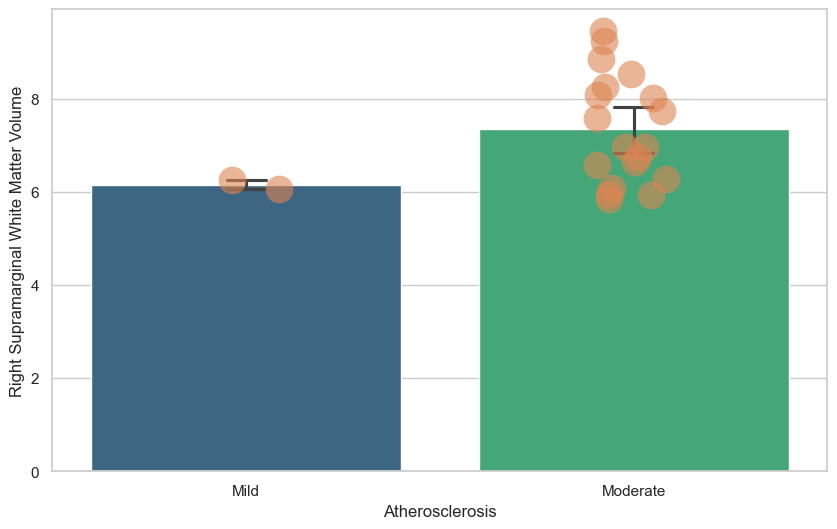

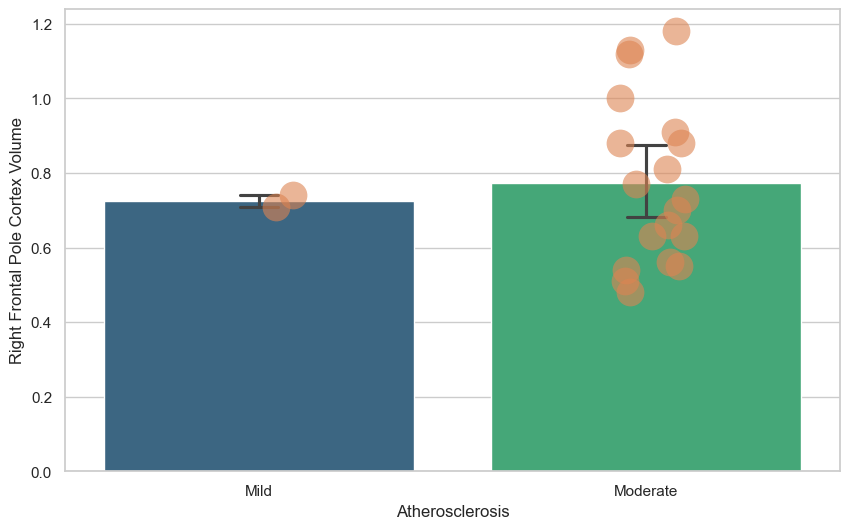

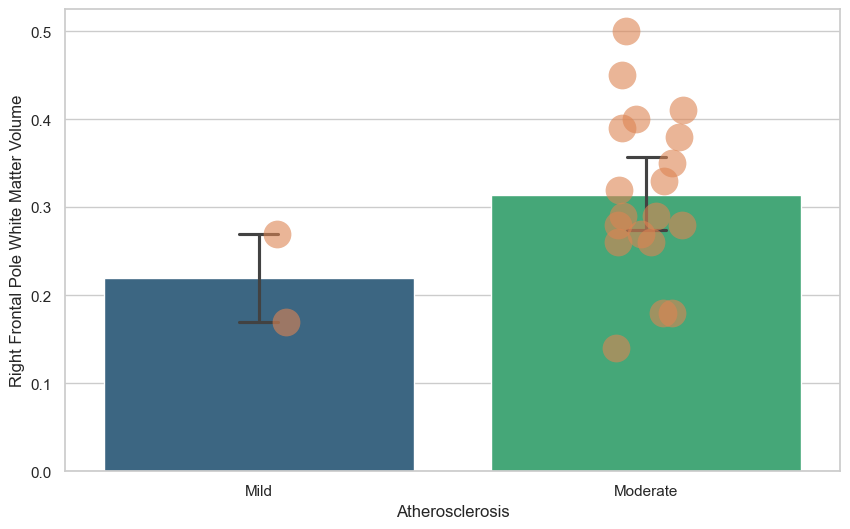

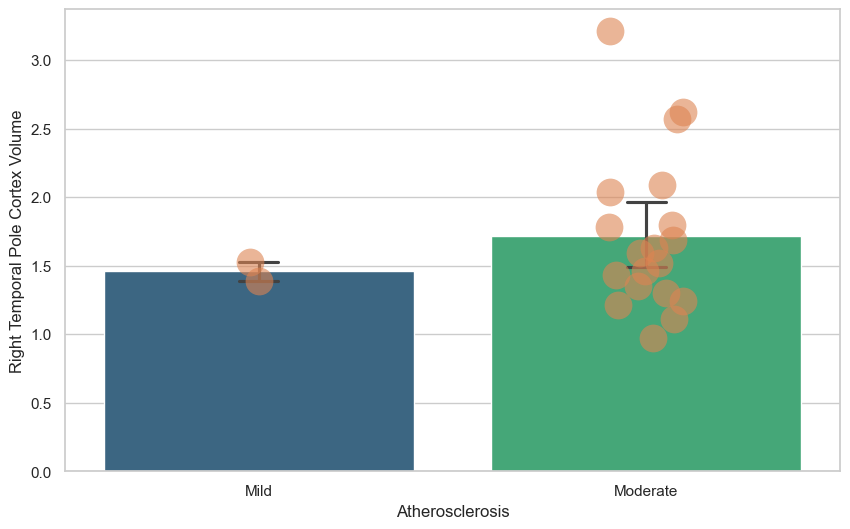

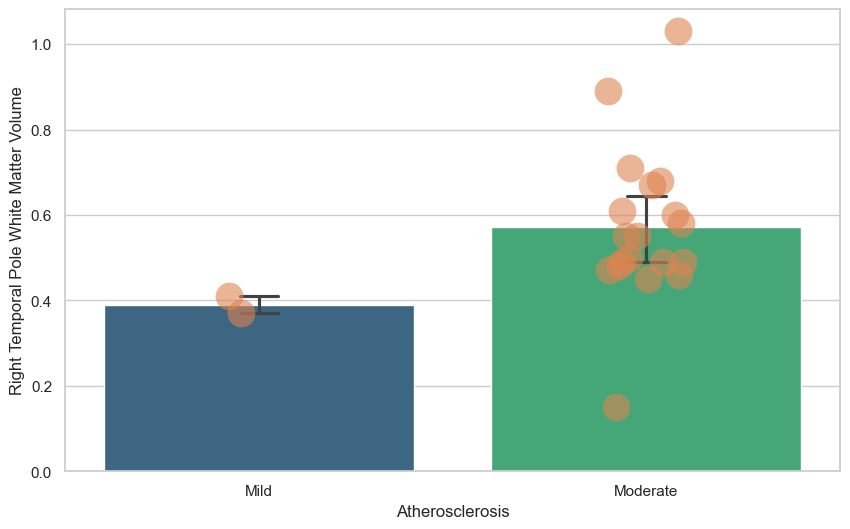

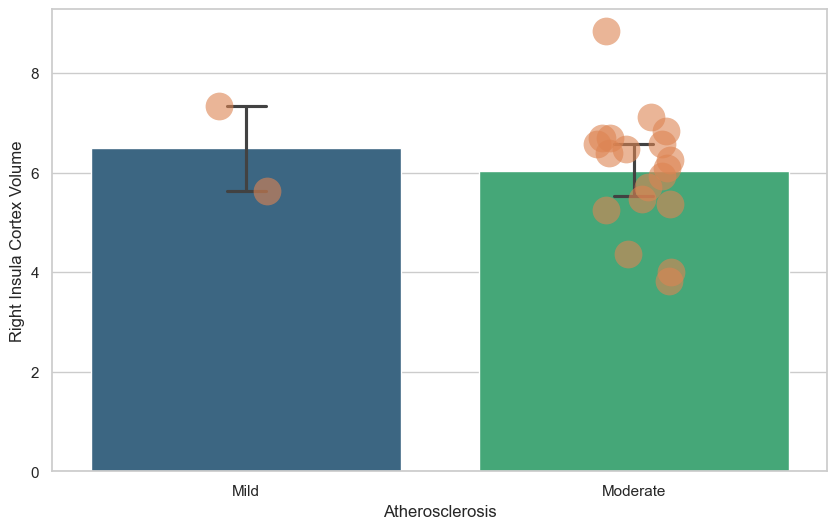

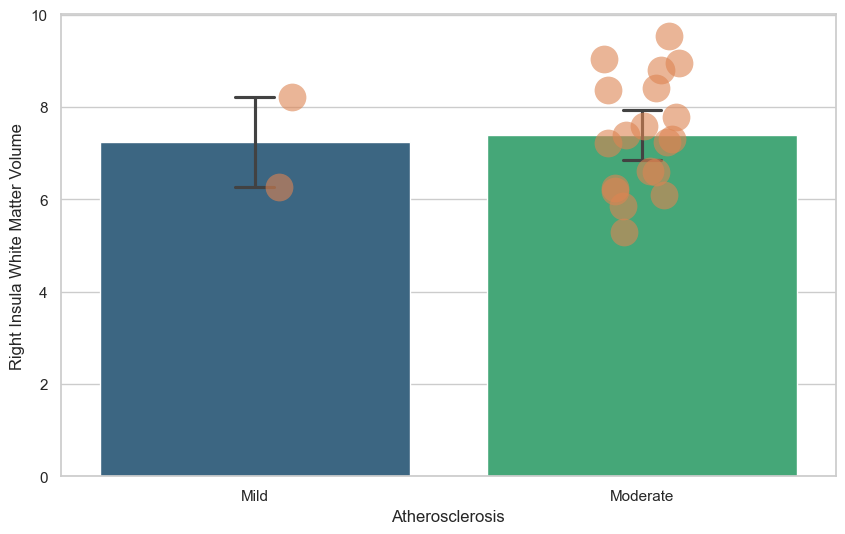

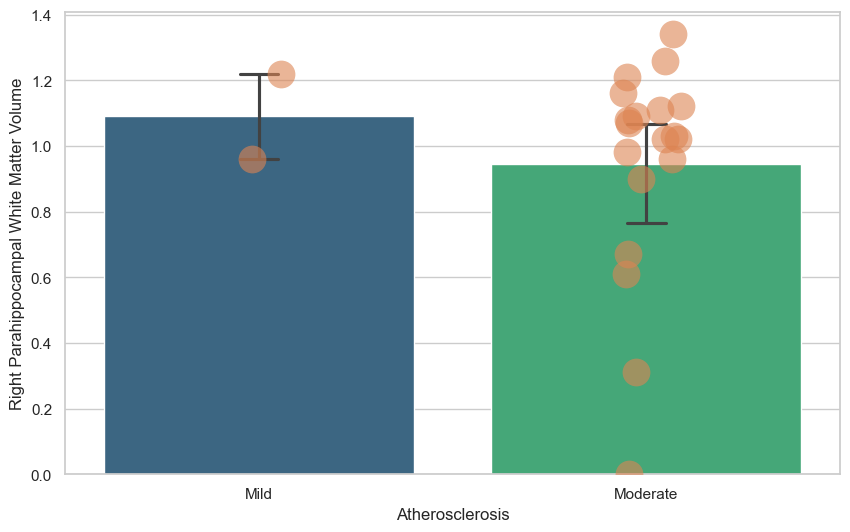

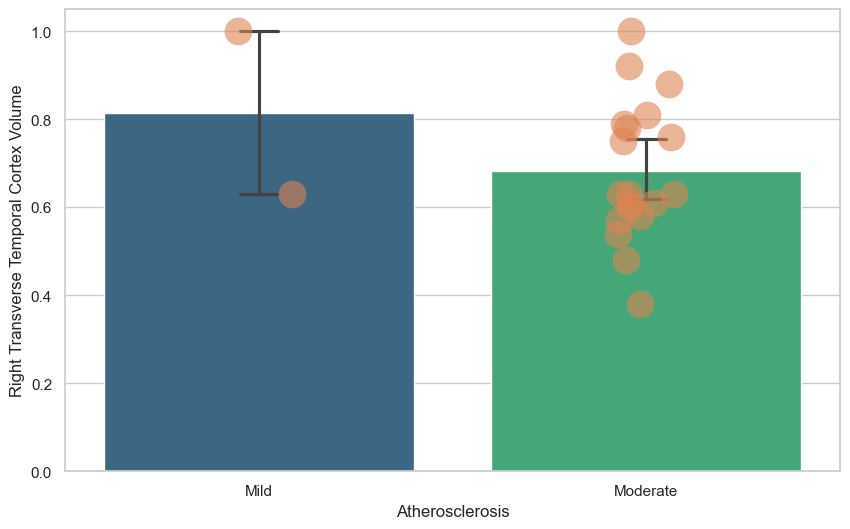

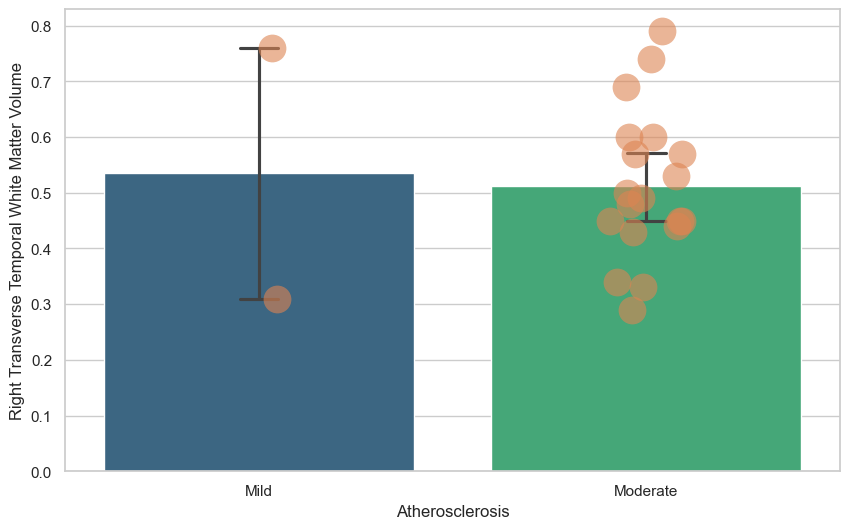

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df[df["Atherosclerosis"] != "Severe"]
df = df[df["Cognitive Status"] == "Dementia"]

outcome = "Last MMSE Score"

print(df["Left Hippocampus Volume"].count())

for outcome in mri.columns[1:]:
    sns.set(style="whitegrid")

    plt.figure(figsize=(10,6))
    ax = sns.barplot(data=df, x="Atherosclerosis", y=outcome, palette="viridis", capsize = 0.1)

    # for i in range(len(df)):
    #     plt.scatter([df['Atherosclerosis'].iloc[i]], [df['Right Hippocampus Volume'].iloc[i]], color='red', s=100, edgecolor='black', zorder=5)
    sns.stripplot(
        x="Atherosclerosis", 
        y=outcome, 
        # hue="Cognitive Status", 
        data=df, dodge=True, alpha=0.6, ax=ax, size=20
    )